In [1]:
data_path <- "C:/Users/kayra/Desktop/Okul/3-2/EVDS_updated.xlsx"

In [2]:
require(openxlsx) #library(openxlsx)
require(ggplot2)
require(data.table)
require(skimr)
require(GGally)
require(ggcorrplot)
require(forecast)

options(repr.plot.width=12.7, repr.plot.height=8.5)

exchange_rate=read.xlsx(data_path,sheet='data_EXCH') #Reading the data

exchange_rate$DATE <- as.Date(exchange_rate$DATE, format = "%Y-%m-%d")
exchange_rate

Zorunlu paket yükleniyor: openxlsx

Warning message:
"package 'openxlsx' was built under R version 4.2.3"
Zorunlu paket yükleniyor: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Zorunlu paket yükleniyor: data.table

Warning message:
"package 'data.table' was built under R version 4.2.3"
Zorunlu paket yükleniyor: skimr

Warning message:
"package 'skimr' was built under R version 4.2.3"
Zorunlu paket yükleniyor: GGally

Warning message:
"package 'GGally' was built under R version 4.2.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Zorunlu paket yükleniyor: ggcorrplot

Warning message:
"package 'ggcorrplot' was built under R version 4.2.3"
Zorunlu paket yükleniyor: forecast

Warning message:
"package 'forecast' was built under R version 4.2.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,DATE,EXCH,MEVTR,REZV,M3ARZ,PAYTP,CPIG,CBBS
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2014-01-01,2.220845,8.94,124270,970753204,2585.33,233.54,265441272
2,2014-02-01,2.216745,10.16,127691,972982043,2150.60,234.54,270204556
3,2014-03-01,2.221786,10.97,126051,980086715,1022.88,237.18,262750465
4,2014-04-01,2.131295,10.83,129732,979170647,795.69,240.37,268243802
5,2014-05-01,2.094565,10.39,130591,969106400,488.00,241.32,268166837
6,2014-06-01,2.119538,9.91,133534,995441200,595.09,242.07,276799271
7,2014-07-01,2.122490,9.26,132666,1007663282,690.71,243.17,272004583
8,2014-08-01,2.162162,8.99,134088,1015167200,494.48,243.40,283188937
9,2014-09-01,2.207559,9.06,131841,1039091253,801.47,243.74,289397364


In [3]:
l_fit = lm(EXCH~.,data=exchange_rate)
l_fit
summary(l_fit)  #Checking the significance levels and R2


Call:
lm(formula = EXCH ~ ., data = exchange_rate)

Coefficients:
(Intercept)         DATE        MEVTR         REZV        M3ARZ        PAYTP  
 -5.429e+00    3.849e-04   -1.882e-02   -1.150e-05    1.108e-09    4.688e-05  
       CPIG         CBBS  
  7.030e-03    2.299e-10  



Call:
lm(formula = EXCH ~ ., data = exchange_rate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83872 -0.31344 -0.03022  0.15946  2.25629 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.429e+00  3.416e+00  -1.589 0.114792    
DATE         3.849e-04  1.816e-04   2.119 0.036279 *  
MEVTR       -1.882e-02  1.839e-02  -1.024 0.308115    
REZV        -1.150e-05  7.051e-06  -1.631 0.105583    
M3ARZ        1.108e-09  3.192e-10   3.472 0.000734 ***
PAYTP        4.688e-05  5.161e-05   0.908 0.365684    
CPIG         7.030e-03  2.231e-03   3.151 0.002082 ** 
CBBS         2.299e-10  4.539e-10   0.506 0.613509    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6278 on 113 degrees of freedom
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9923 
F-statistic:  2196 on 7 and 113 DF,  p-value: < 2.2e-16


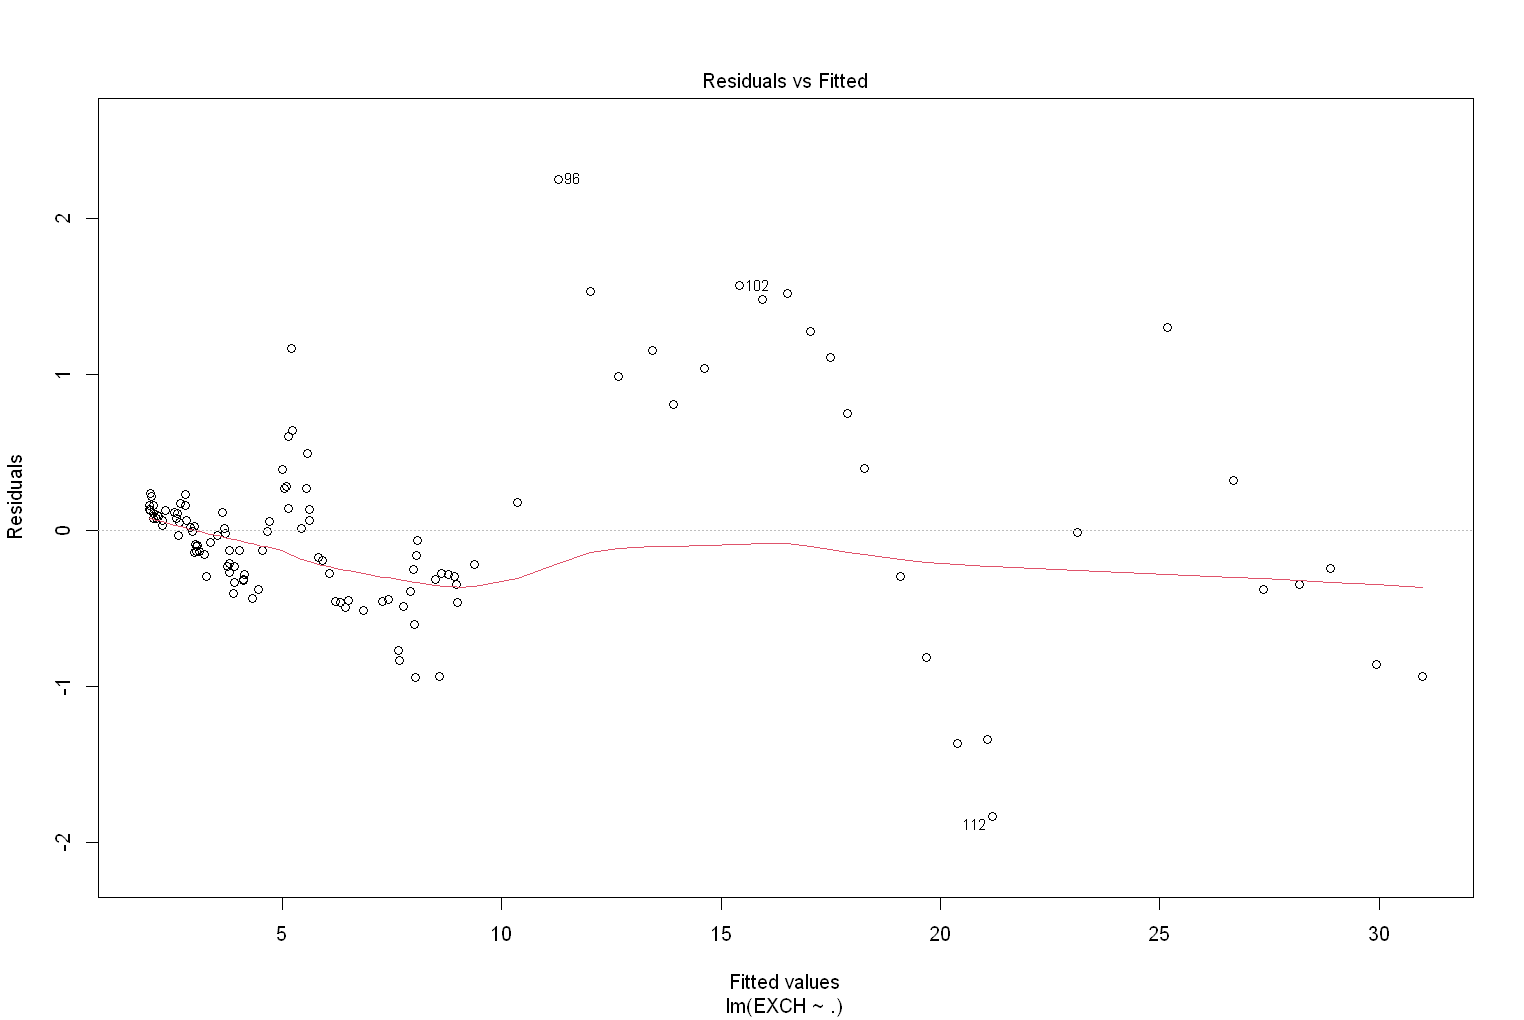

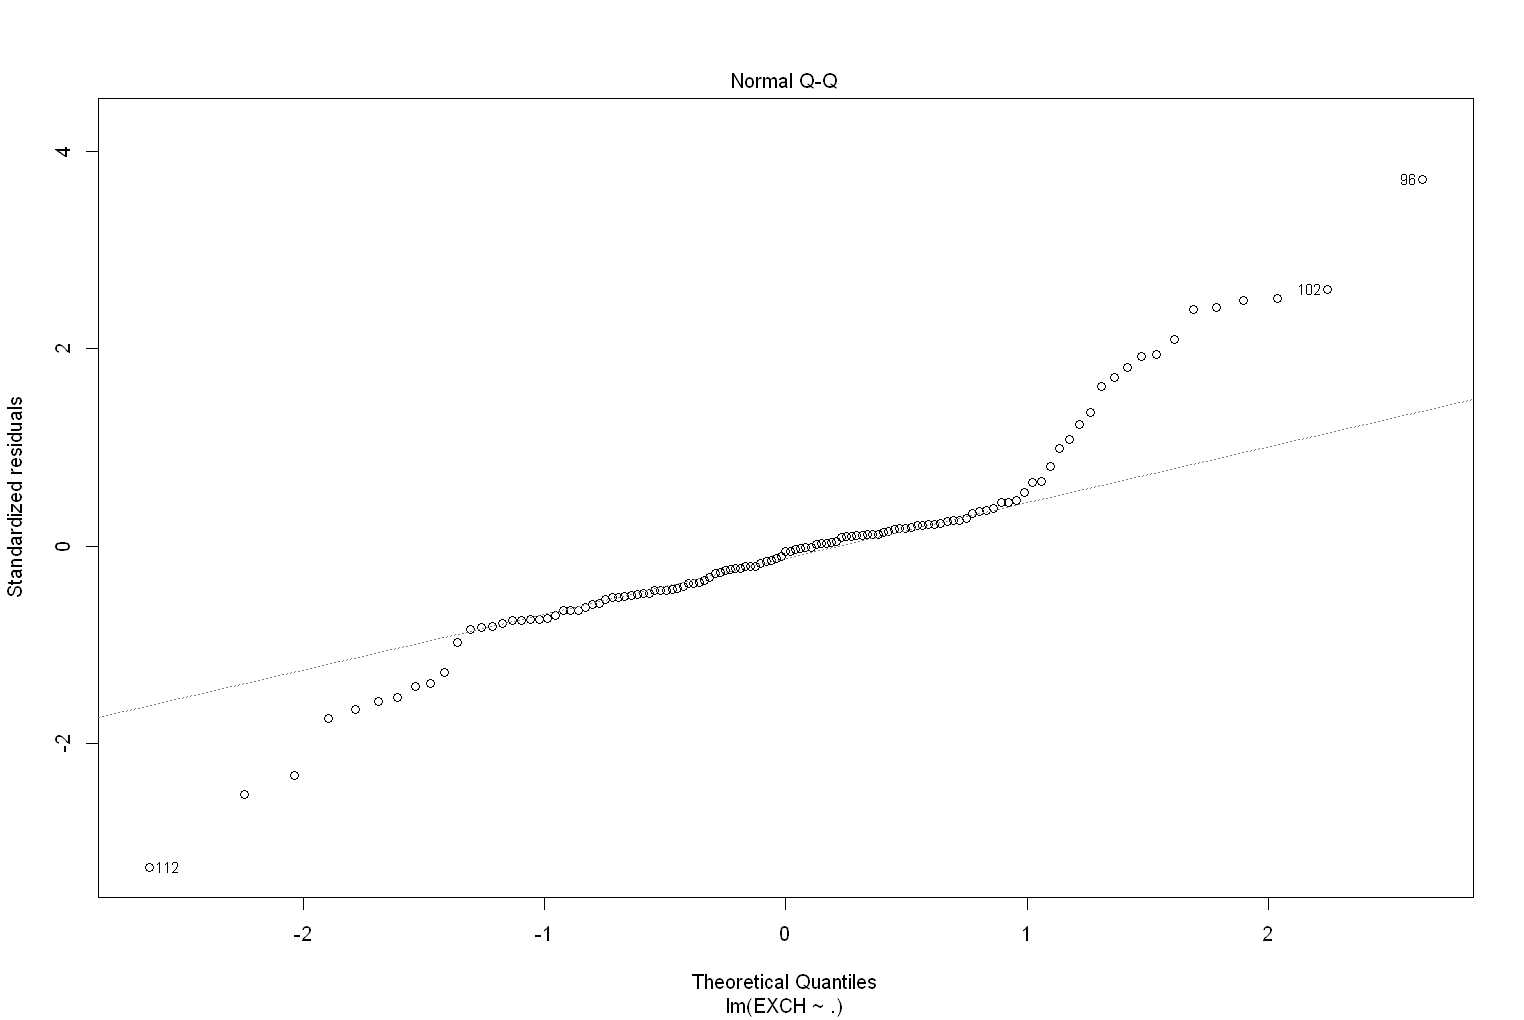

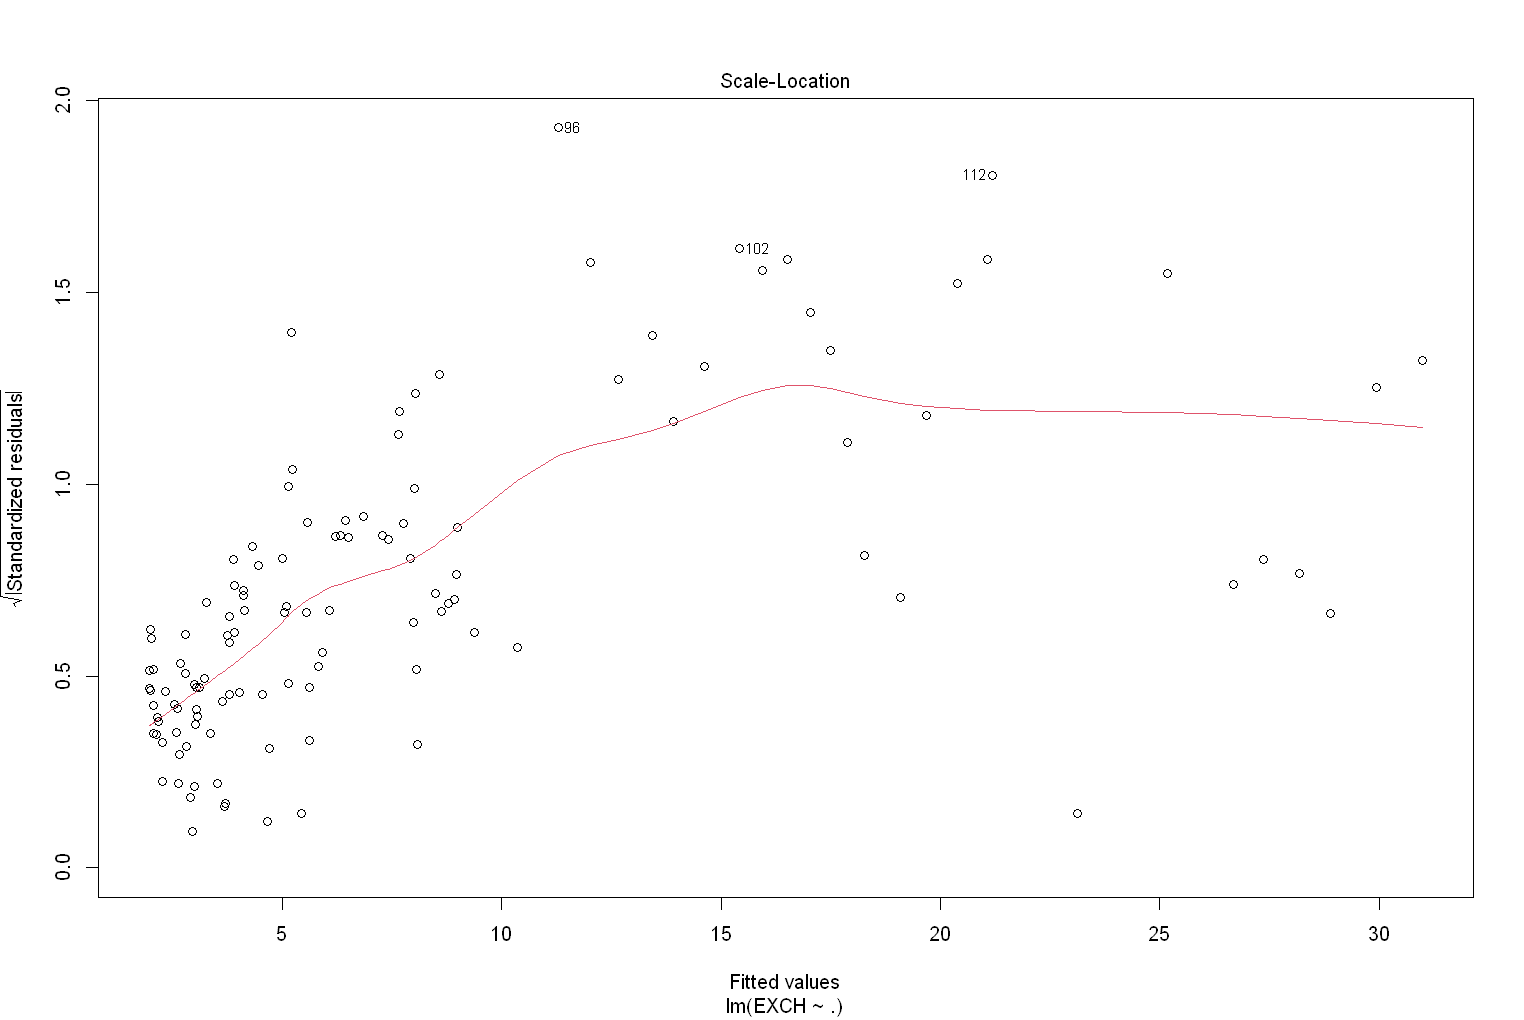

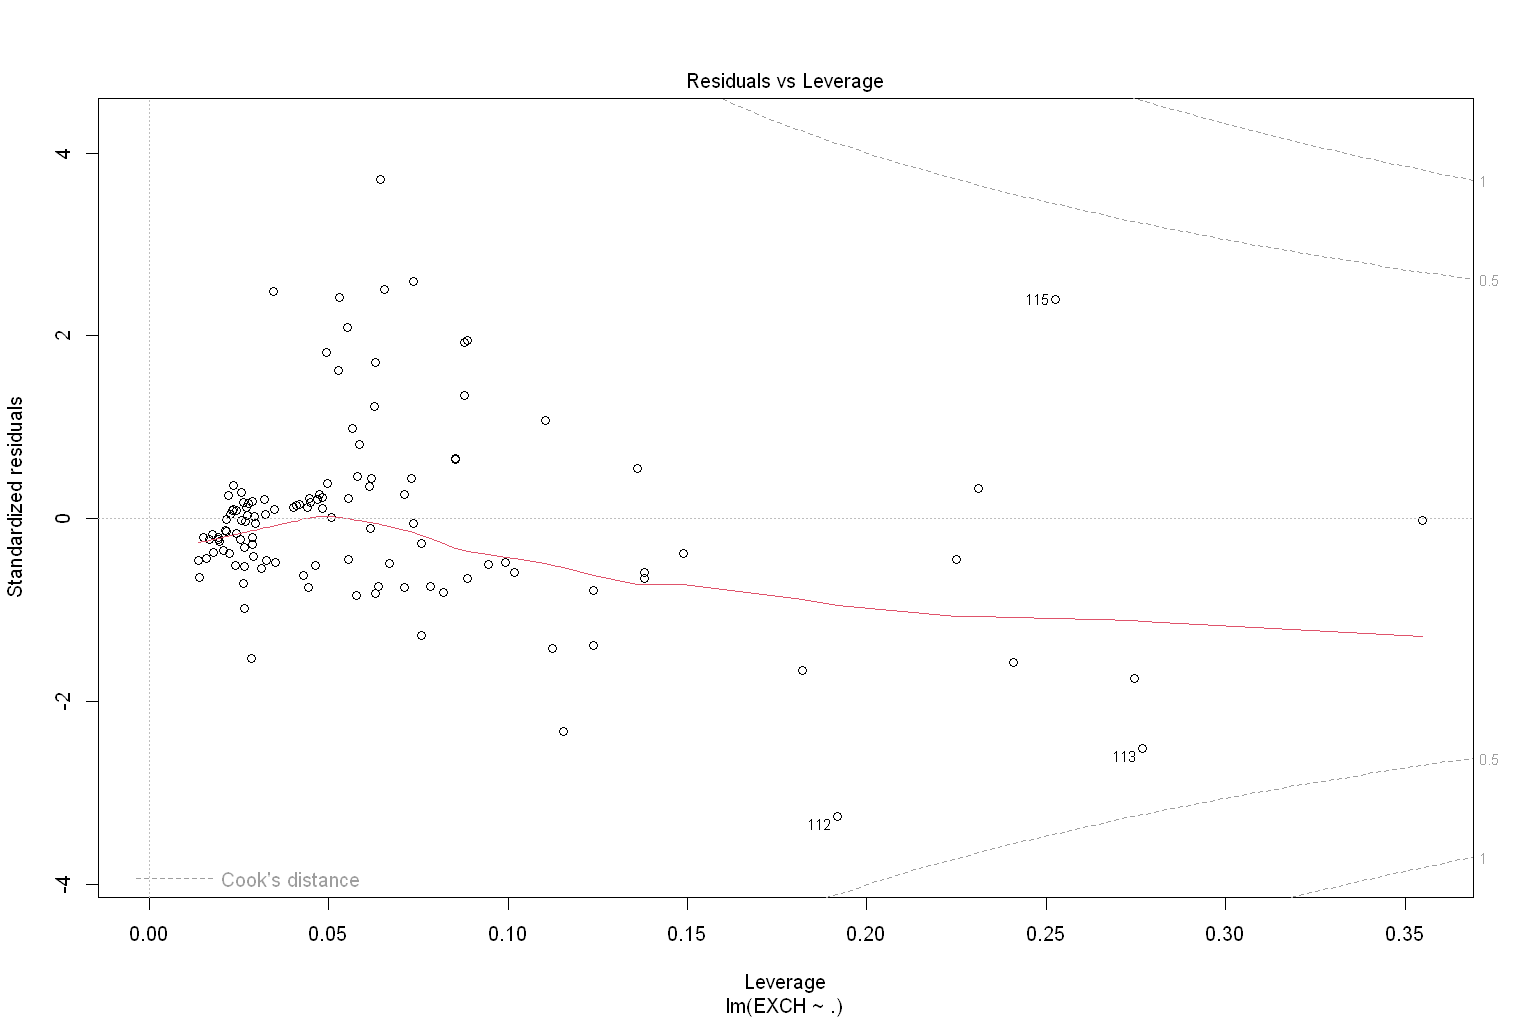

In [4]:
plot(l_fit)

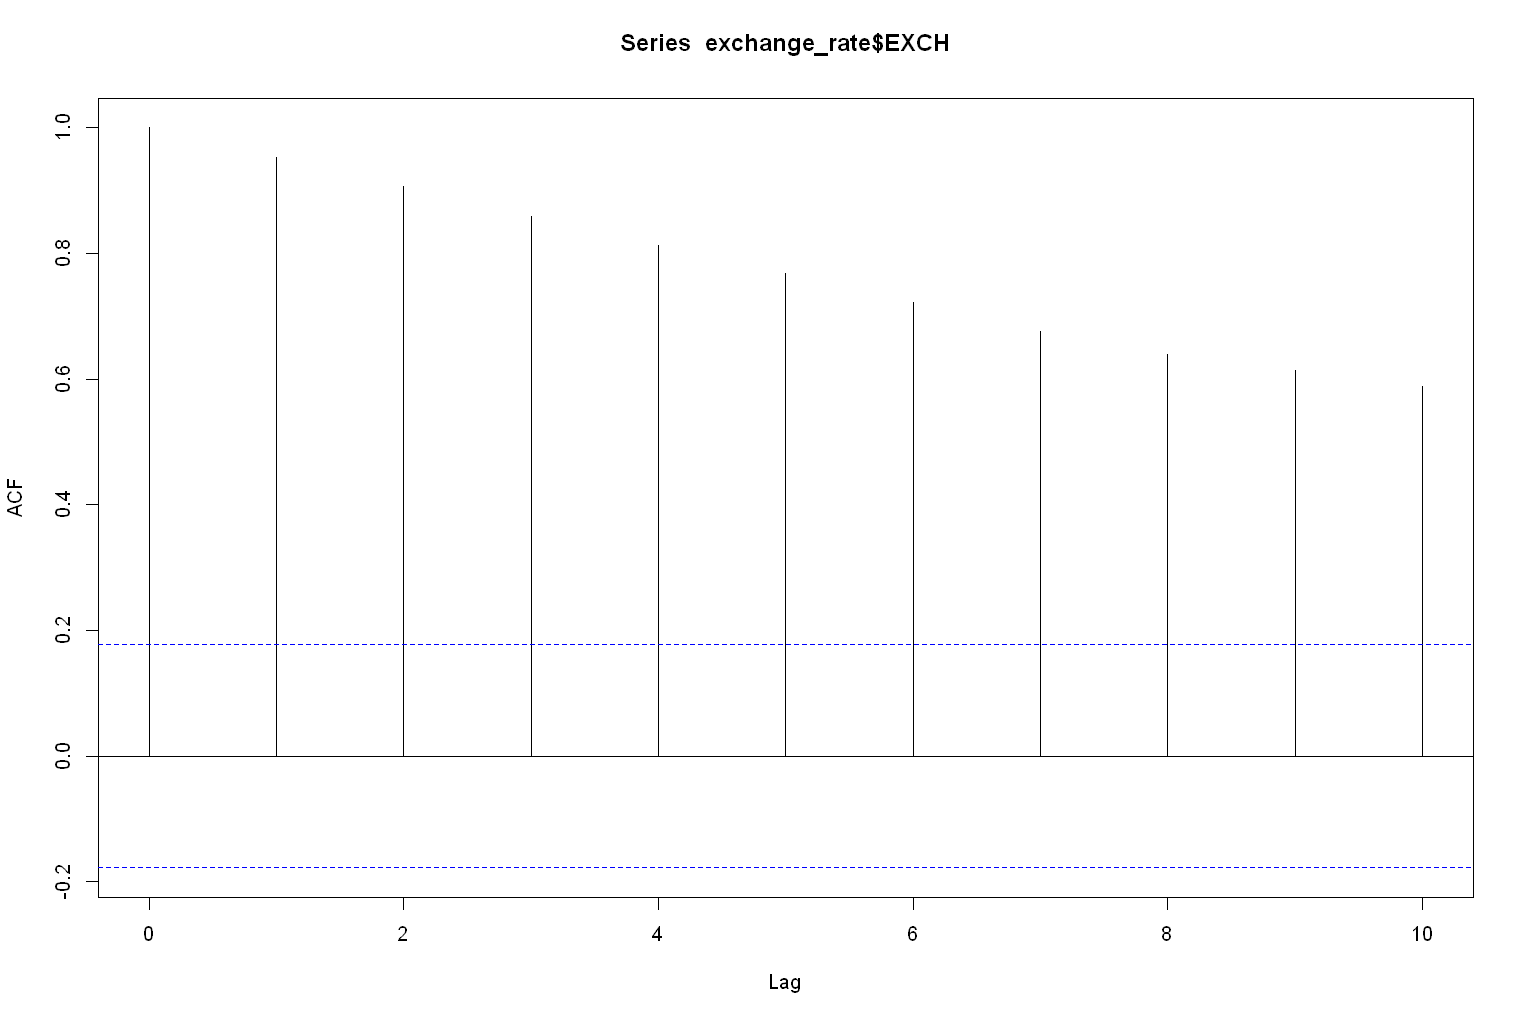

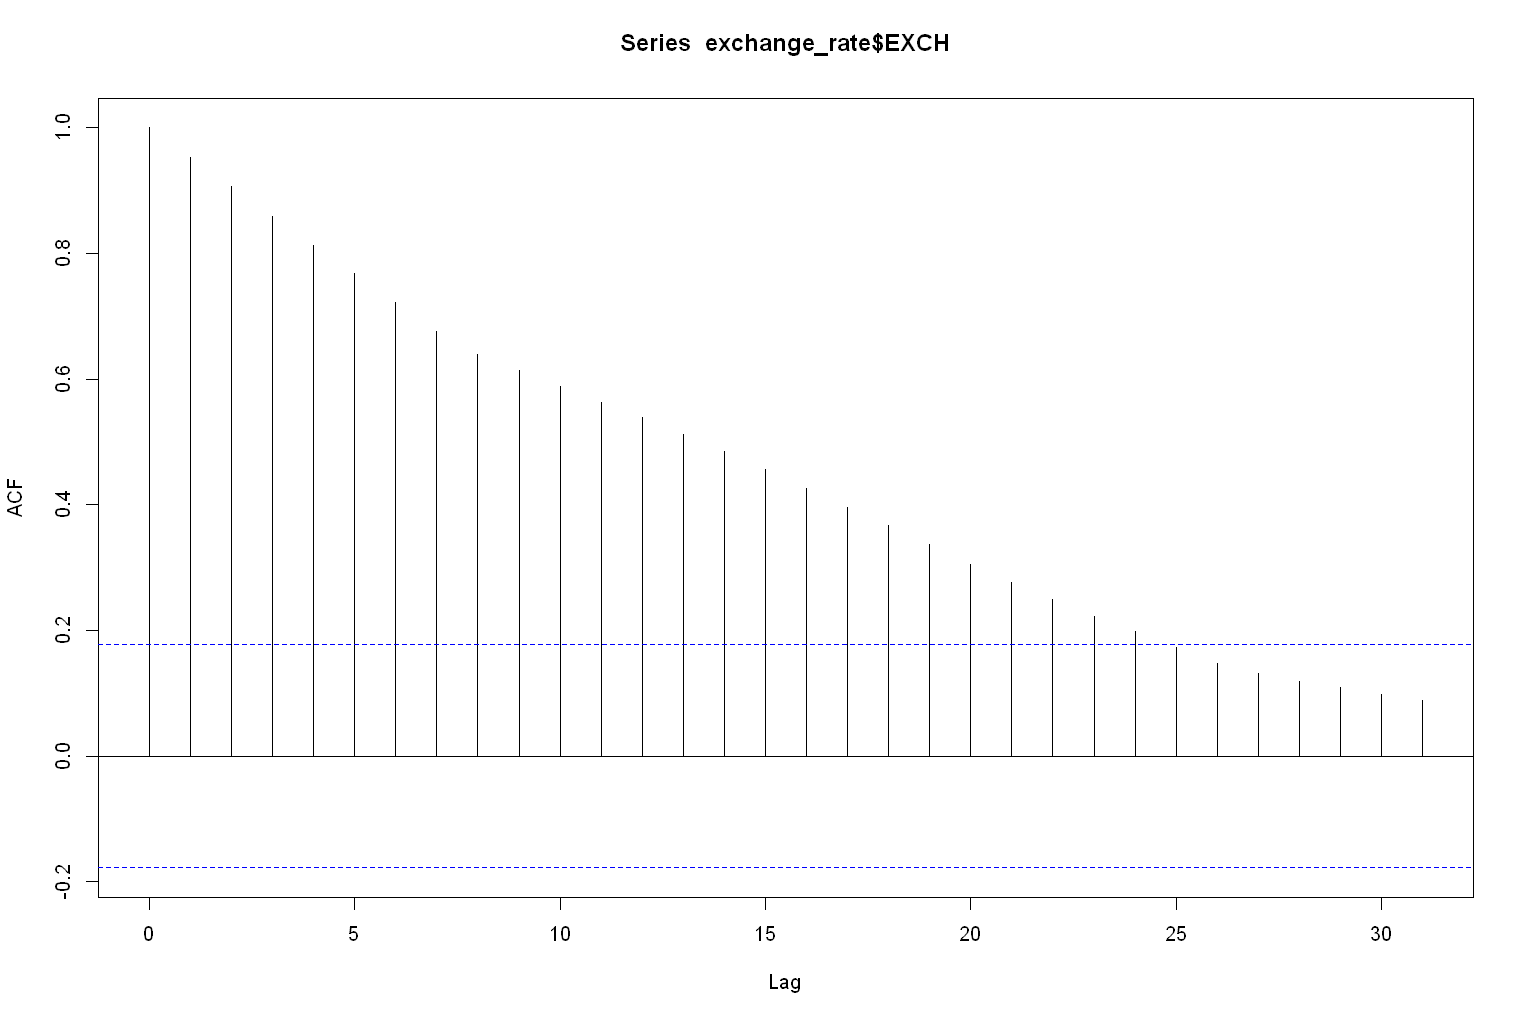

,DATE,EXCH,MEVTR,REZV,M3ARZ,PAYTP,CPIG,CBBS,month_name
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
116,2023-08-01,26.99913,26.88,116647,12343401954,4340.17,1614.31,5186410031,August
117,2023-09-01,26.98945,31.75,122196,12666105927,1190.97,1691.04,5538263802,September
118,2023-10-01,27.84611,35.64,126185,13093467551,1055.18,1749.11,5778088947,October
119,2023-11-01,28.63708,40.59,136680,13416124412,1402.29,1806.50,6278521190,November
120,2023-12-01,29.07486,44.34,140884,14018354253,2768.09,1859.38,6520597030,December
121,2024-01-01,30.05375,45.53,133858,14175495549,1454.27,1984.02,6506712407,January


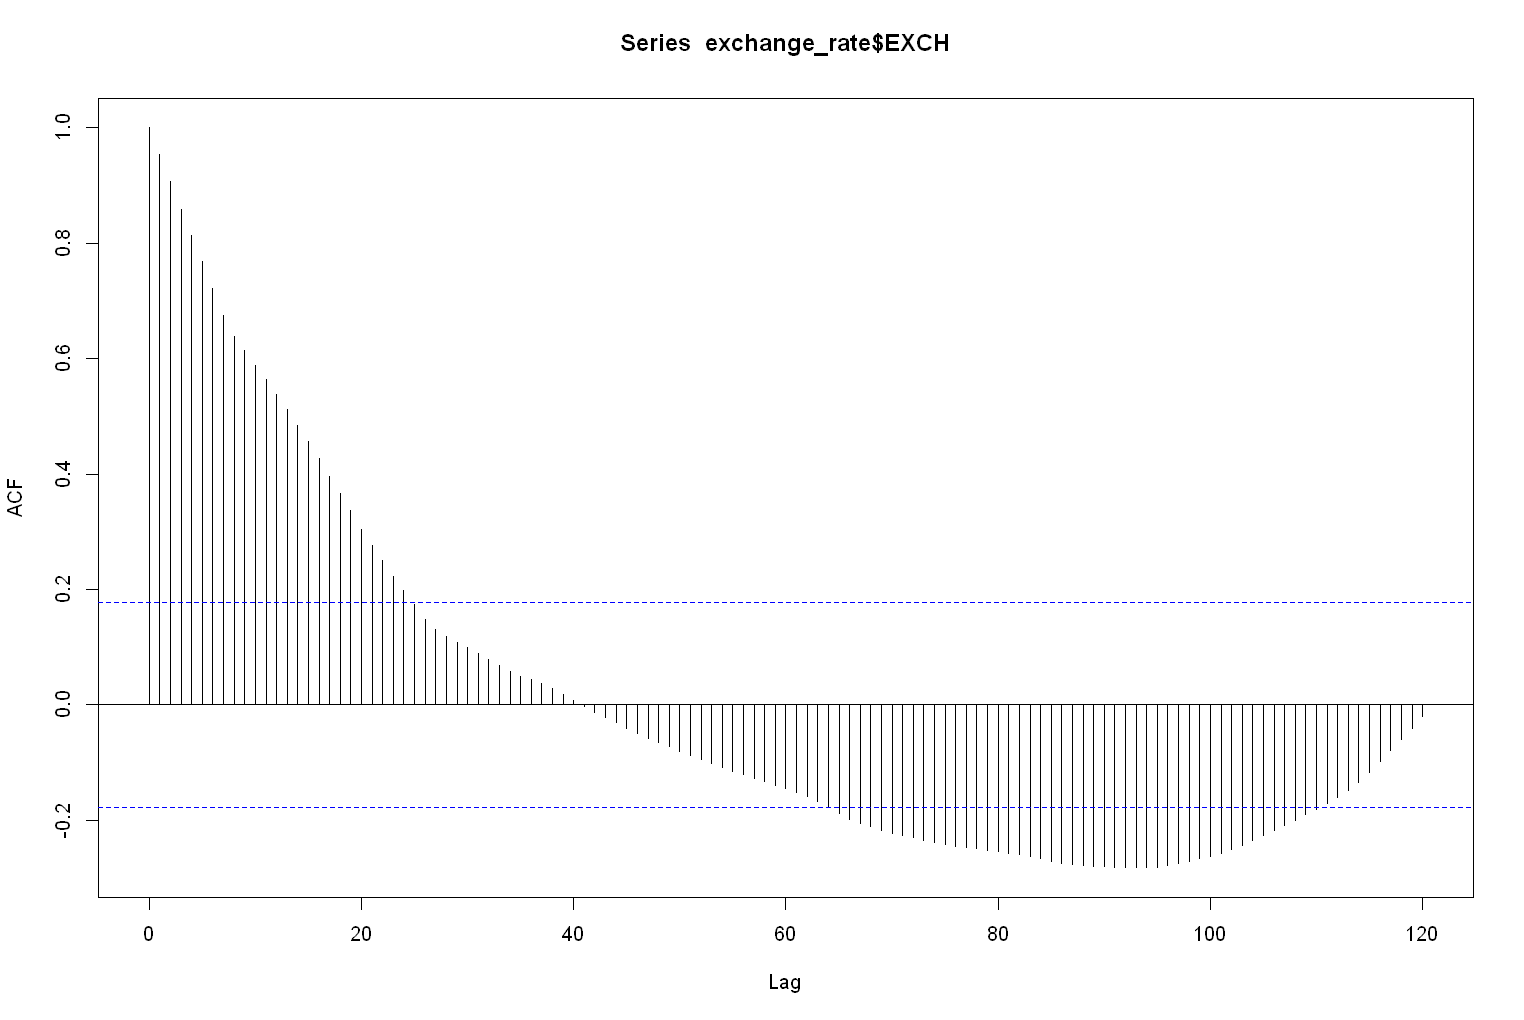

In [5]:
acf(exchange_rate$EXCH, lag.max = 10)
acf(exchange_rate$EXCH, lag.max = 31)
acf(exchange_rate$EXCH, lag.max = 360)
exchange_rate$month_name <- month.name[month(exchange_rate$DATE)] #Adding categorical month variables for seasonality
tail(exchange_rate)

In [6]:
l_fit = lm(EXCH~.,data=exchange_rate)
l_fit
summary(l_fit)


Call:
lm(formula = EXCH ~ ., data = exchange_rate)

Coefficients:
        (Intercept)                 DATE                MEVTR  
         -5.102e+00            3.347e-04           -1.932e-02  
               REZV                M3ARZ                PAYTP  
         -1.143e-05            9.958e-10            8.049e-05  
               CPIG                 CBBS     month_nameAugust  
          8.712e-03            2.396e-11            3.946e-01  
 month_nameDecember   month_nameFebruary    month_nameJanuary  
          3.708e-01            1.079e-01            1.798e-01  
     month_nameJuly       month_nameJune      month_nameMarch  
          3.818e-01            2.992e-01           -3.321e-02  
      month_nameMay   month_nameNovember    month_nameOctober  
          1.506e-01            3.235e-01            3.177e-01  
month_nameSeptember  
          3.080e-01  



Call:
lm(formula = EXCH ~ ., data = exchange_rate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74017 -0.31056 -0.07063  0.20612  2.19432 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -5.102e+00  3.668e+00  -1.391 0.167259    
DATE                 3.347e-04  1.964e-04   1.704 0.091429 .  
MEVTR               -1.932e-02  1.904e-02  -1.015 0.312540    
REZV                -1.143e-05  7.389e-06  -1.547 0.125008    
M3ARZ                9.958e-10  3.446e-10   2.890 0.004707 ** 
PAYTP                8.049e-05  5.892e-05   1.366 0.174925    
CPIG                 8.712e-03  2.461e-03   3.540 0.000605 ***
CBBS                 2.396e-11  4.877e-10   0.049 0.960920    
month_nameAugust     3.946e-01  2.949e-01   1.338 0.183852    
month_nameDecember   3.708e-01  2.981e-01   1.244 0.216458    
month_nameFebruary   1.079e-01  2.920e-01   0.369 0.712541    
month_nameJanuary    1.798e-01  2.879e-01   0.624 0.533757    
month_name

`geom_smooth()` using formula = 'y ~ x'


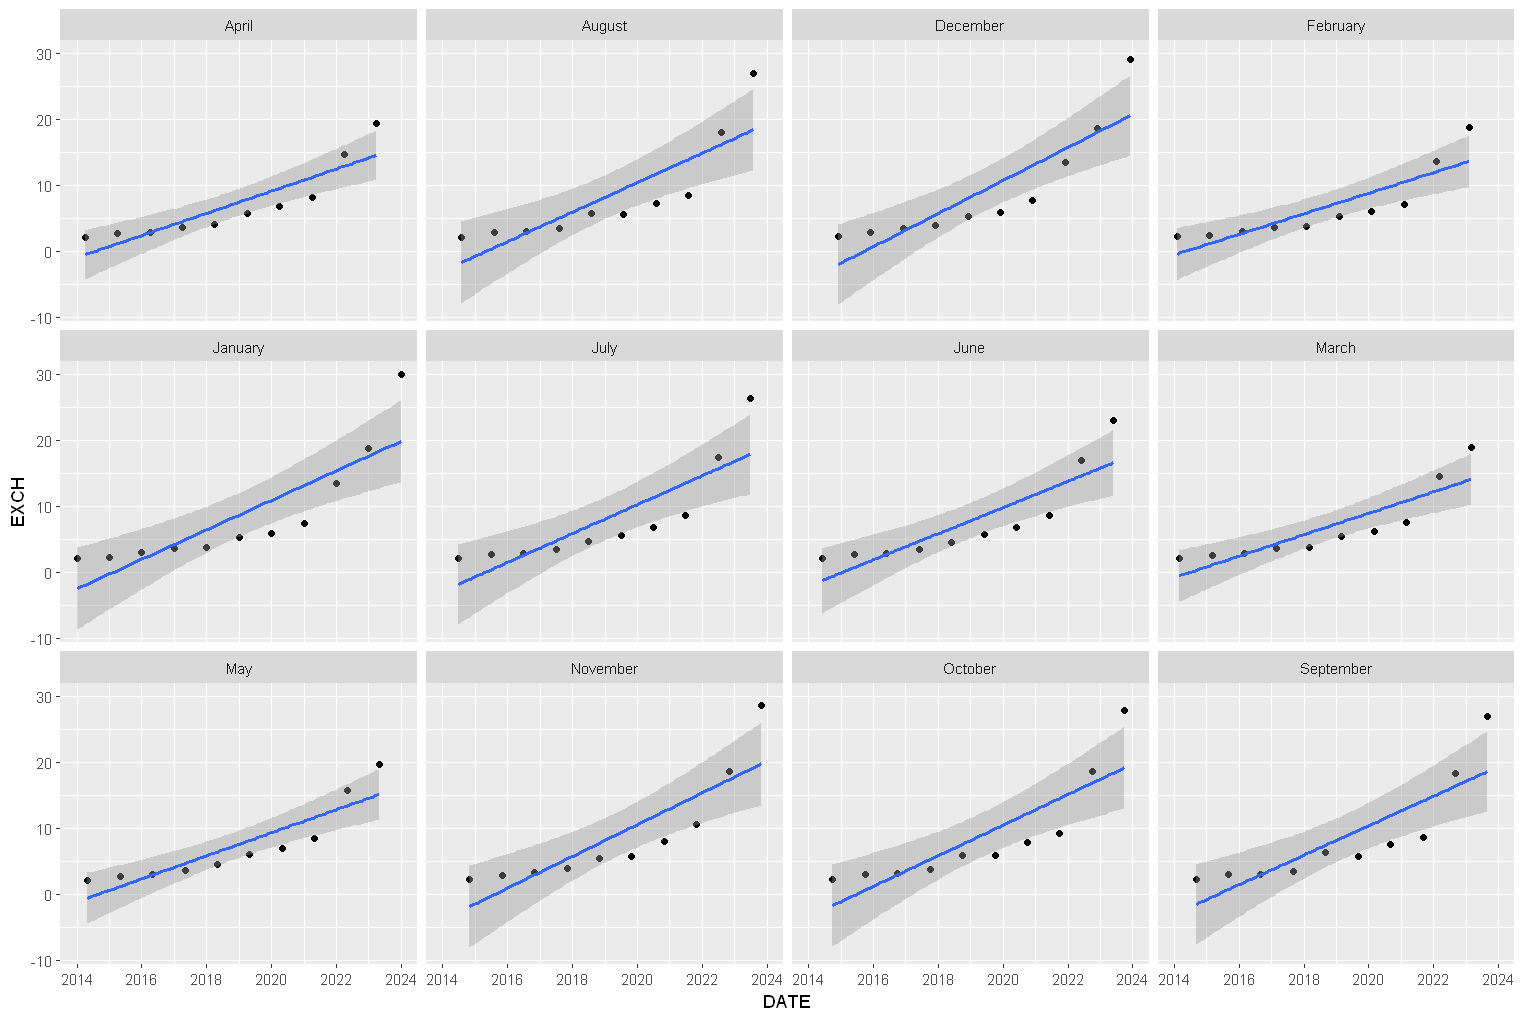

In [7]:
ggplot(exchange_rate,aes(x=DATE,y=EXCH)) +    #Checking for any irregularities within the same months of the years
  geom_point() + geom_smooth(method=lm,linewidth=1) + facet_wrap(~month_name)

[1] 1.275595e-17

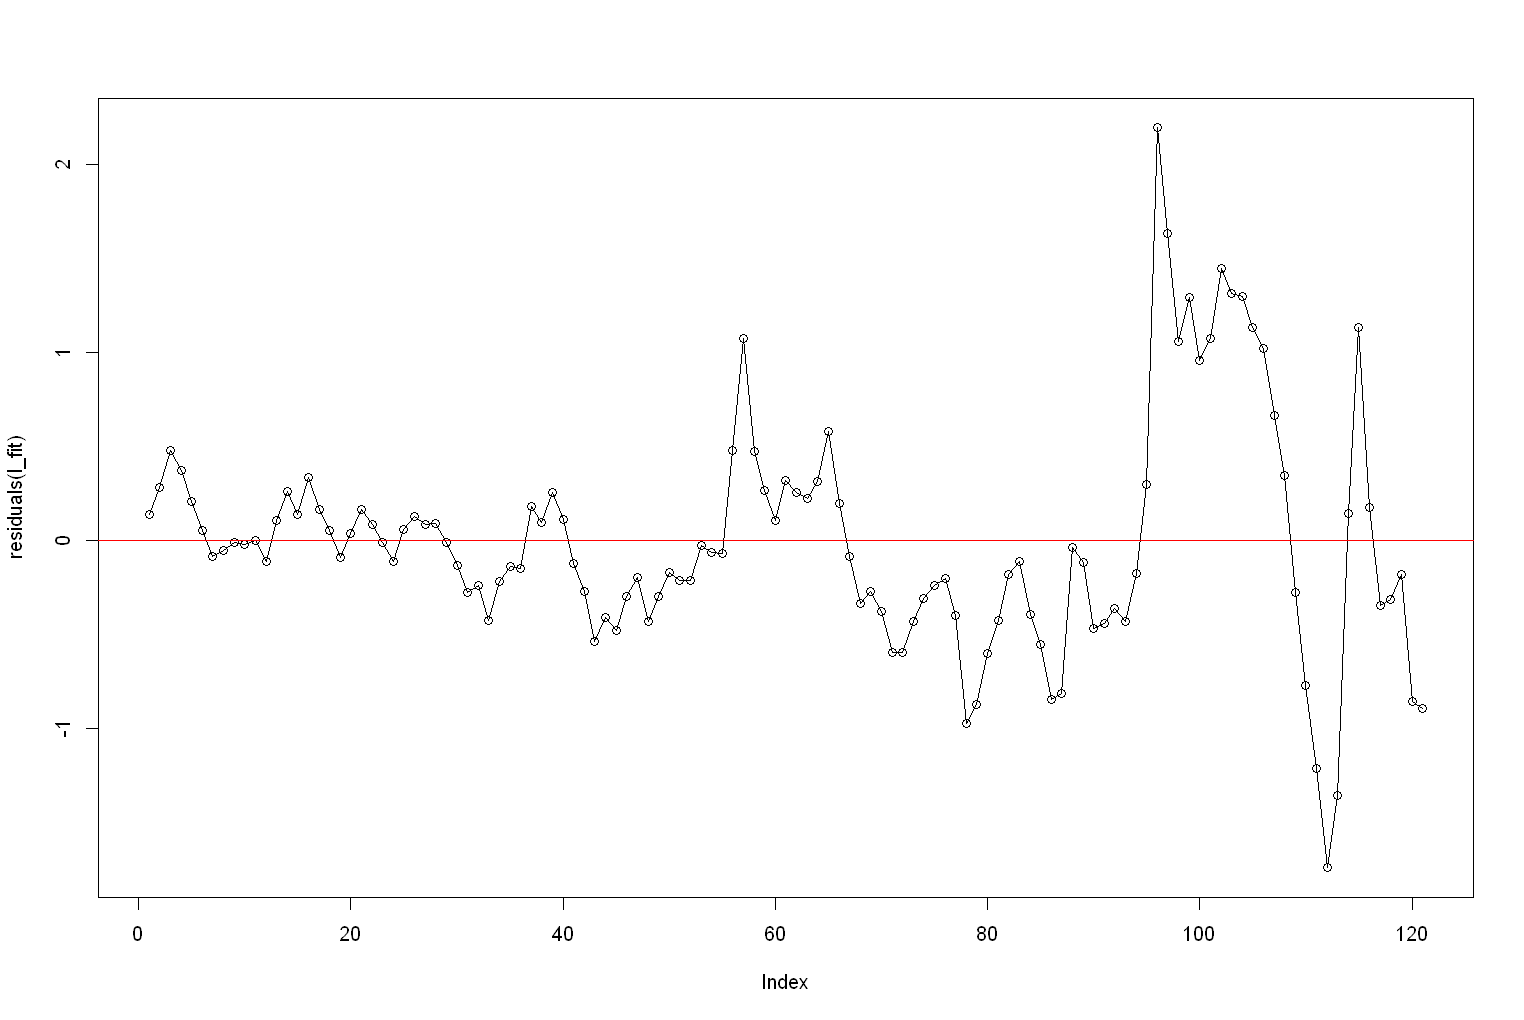

In [8]:
plot(residuals(l_fit), type="o")
abline(h = mean(residuals(l_fit)), col = "red")
mean(residuals(l_fit))

In [9]:
nlin_exchange_rate <- copy(exchange_rate)
nlin_exchange_rate$log_EXCH <- log(exchange_rate$EXCH)
nlin_exchange_rate$log_CBBS <- log(exchange_rate$CBBS)
nlin_exchange_rate$log_CPIG <- log(exchange_rate$CPIG)
nlin_exchange_rate$log_M3ARZ <- log(exchange_rate$M3ARZ)

In [10]:
nl_fit = lm(log_EXCH~.,data=nlin_exchange_rate)
nl_fit
summary(nl_fit)


Call:
lm(formula = log_EXCH ~ ., data = nlin_exchange_rate)

Coefficients:
        (Intercept)                 DATE                 EXCH  
         -1.695e+01           -2.218e-05            7.544e-02  
              MEVTR                 REZV                M3ARZ  
          5.352e-03           -1.708e-06           -1.407e-10  
              PAYTP                 CPIG                 CBBS  
         -5.004e-06           -3.260e-04            1.336e-11  
   month_nameAugust   month_nameDecember   month_nameFebruary  
         -1.266e-03            8.154e-03            1.276e-02  
  month_nameJanuary       month_nameJuly       month_nameJune  
          1.212e-02           -1.419e-02           -1.062e-02  
    month_nameMarch        month_nameMay   month_nameNovember  
          9.628e-03           -6.468e-03            1.114e-02  
  month_nameOctober  month_nameSeptember             log_CBBS  
          6.409e-03            9.567e-04           -8.017e-02  
           log_CPIG         


Call:
lm(formula = log_EXCH ~ ., data = nlin_exchange_rate)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.068444 -0.015911  0.001247  0.013520  0.067620 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.695e+01  1.556e+00 -10.897  < 2e-16 ***
DATE                -2.218e-05  4.271e-05  -0.519   0.6047    
EXCH                 7.544e-02  8.556e-03   8.817 4.45e-14 ***
MEVTR                5.352e-03  9.033e-04   5.924 4.67e-08 ***
REZV                -1.708e-06  7.246e-07  -2.357   0.0204 *  
M3ARZ               -1.406e-10  2.361e-11  -5.956 4.05e-08 ***
PAYTP               -5.004e-06  2.529e-06  -1.979   0.0506 .  
CPIG                -3.260e-04  2.424e-04  -1.345   0.1818    
CBBS                 1.336e-11  4.316e-11   0.310   0.7575    
month_nameAugust    -1.266e-03  1.279e-02  -0.099   0.9213    
month_nameDecember   8.154e-03  1.315e-02   0.620   0.5367    
month_nameFebruary   1.276e-02  1.247e-02   1.024   0.

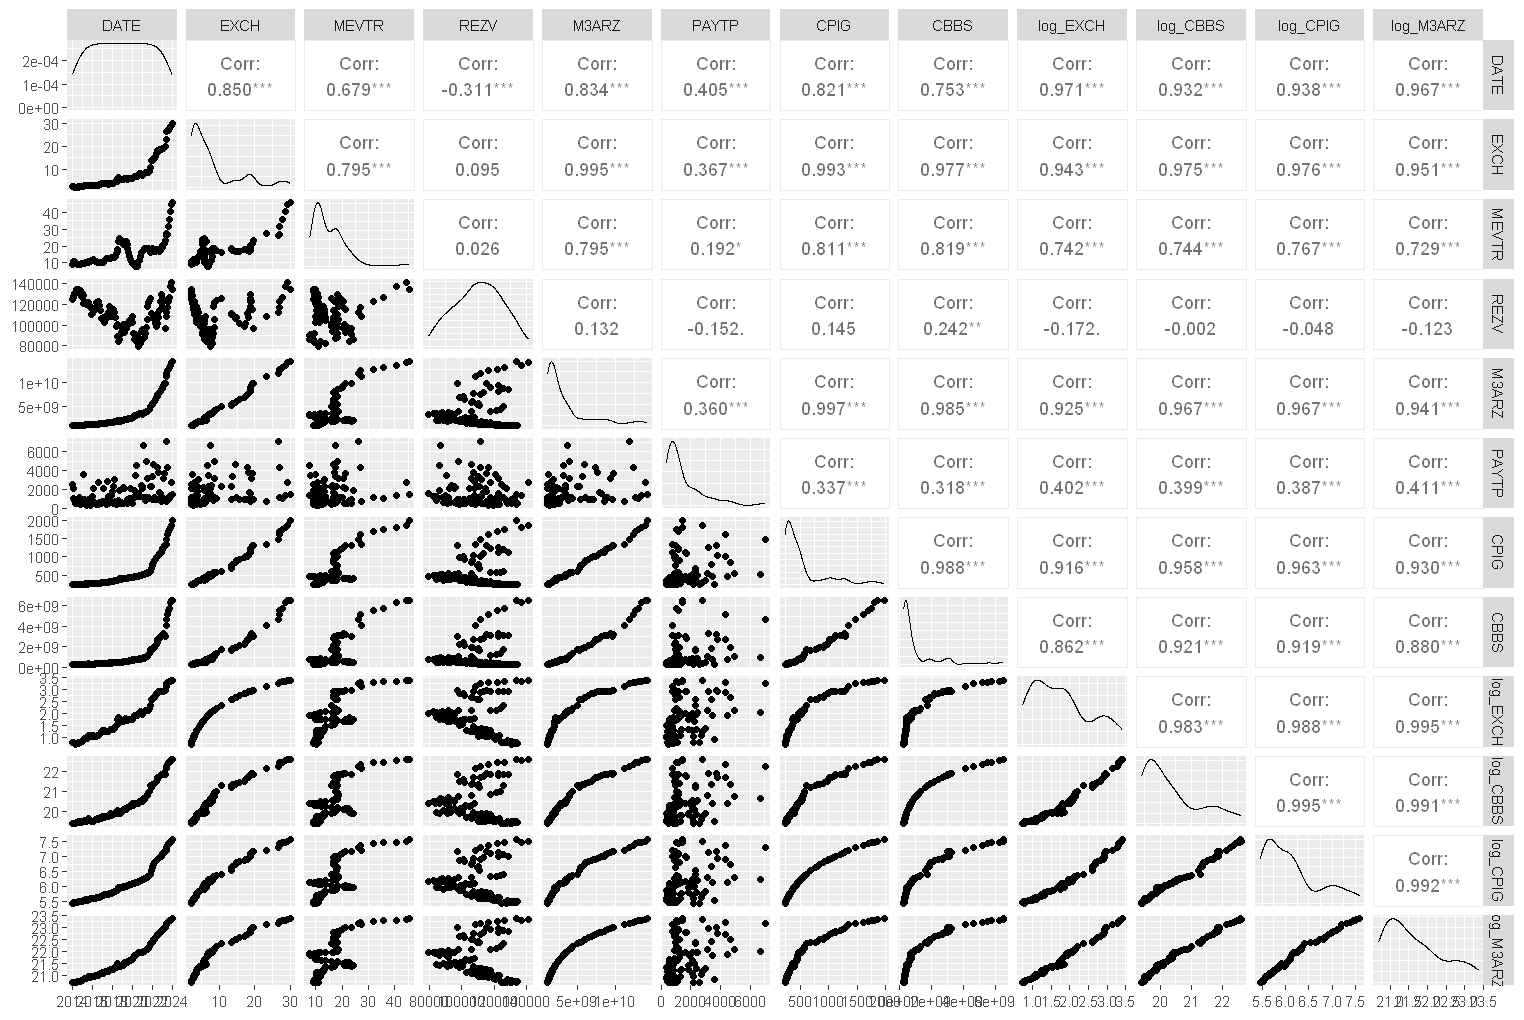

In [11]:
ggpairs(nlin_exchange_rate[, !names(nlin_exchange_rate) %in% "month_name"])

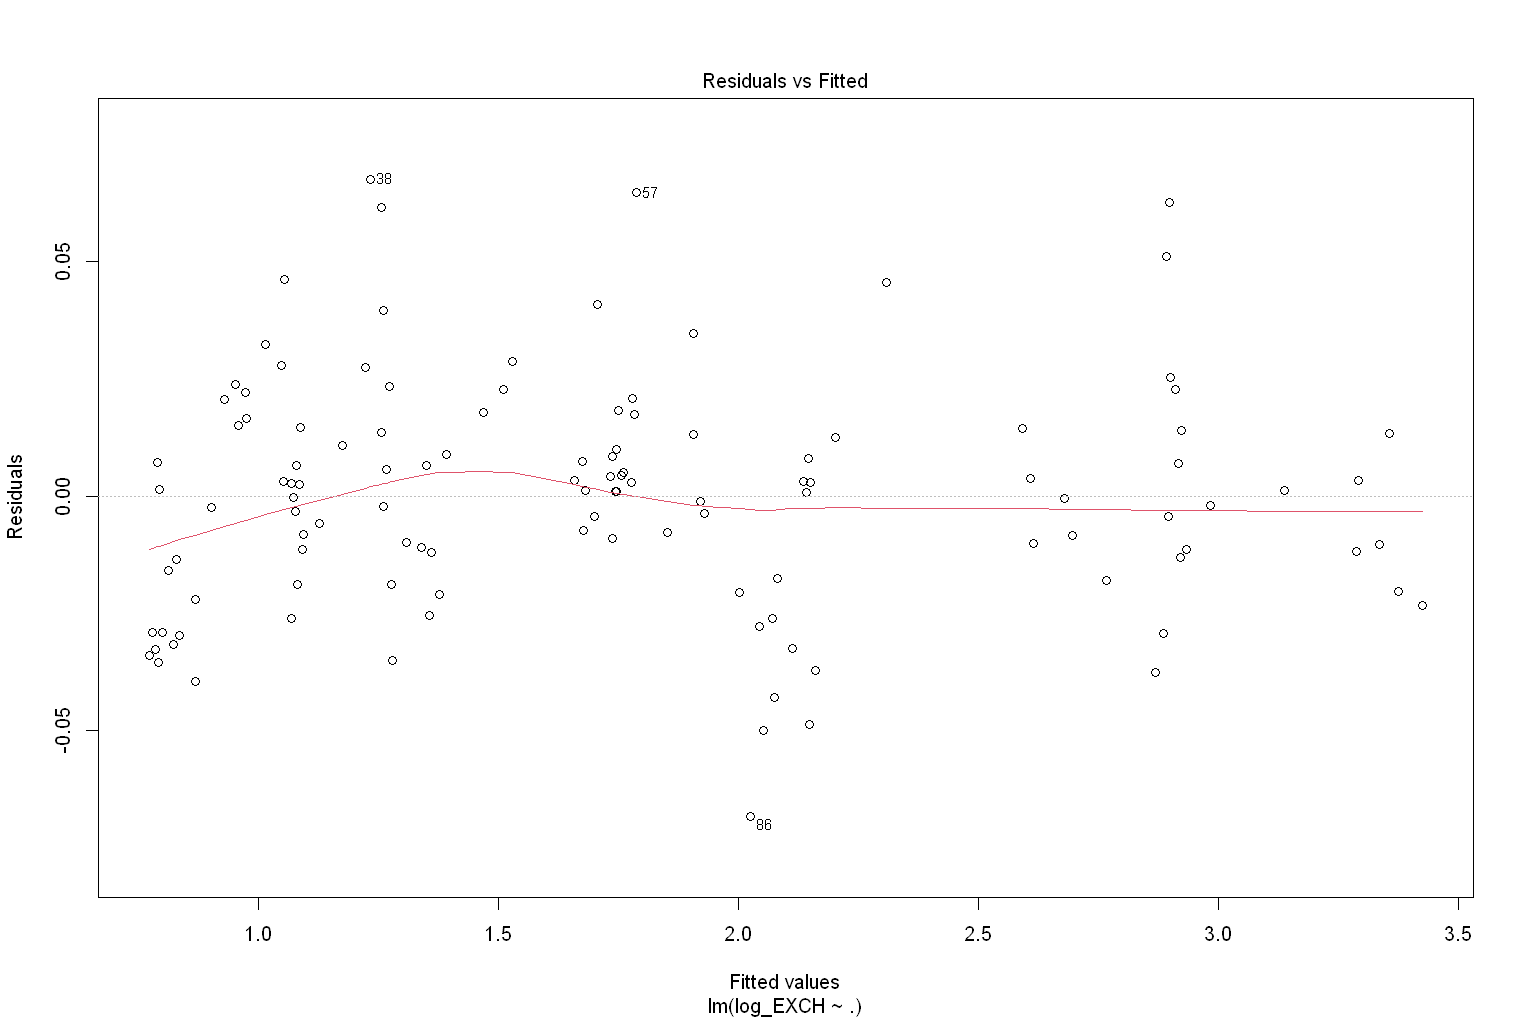

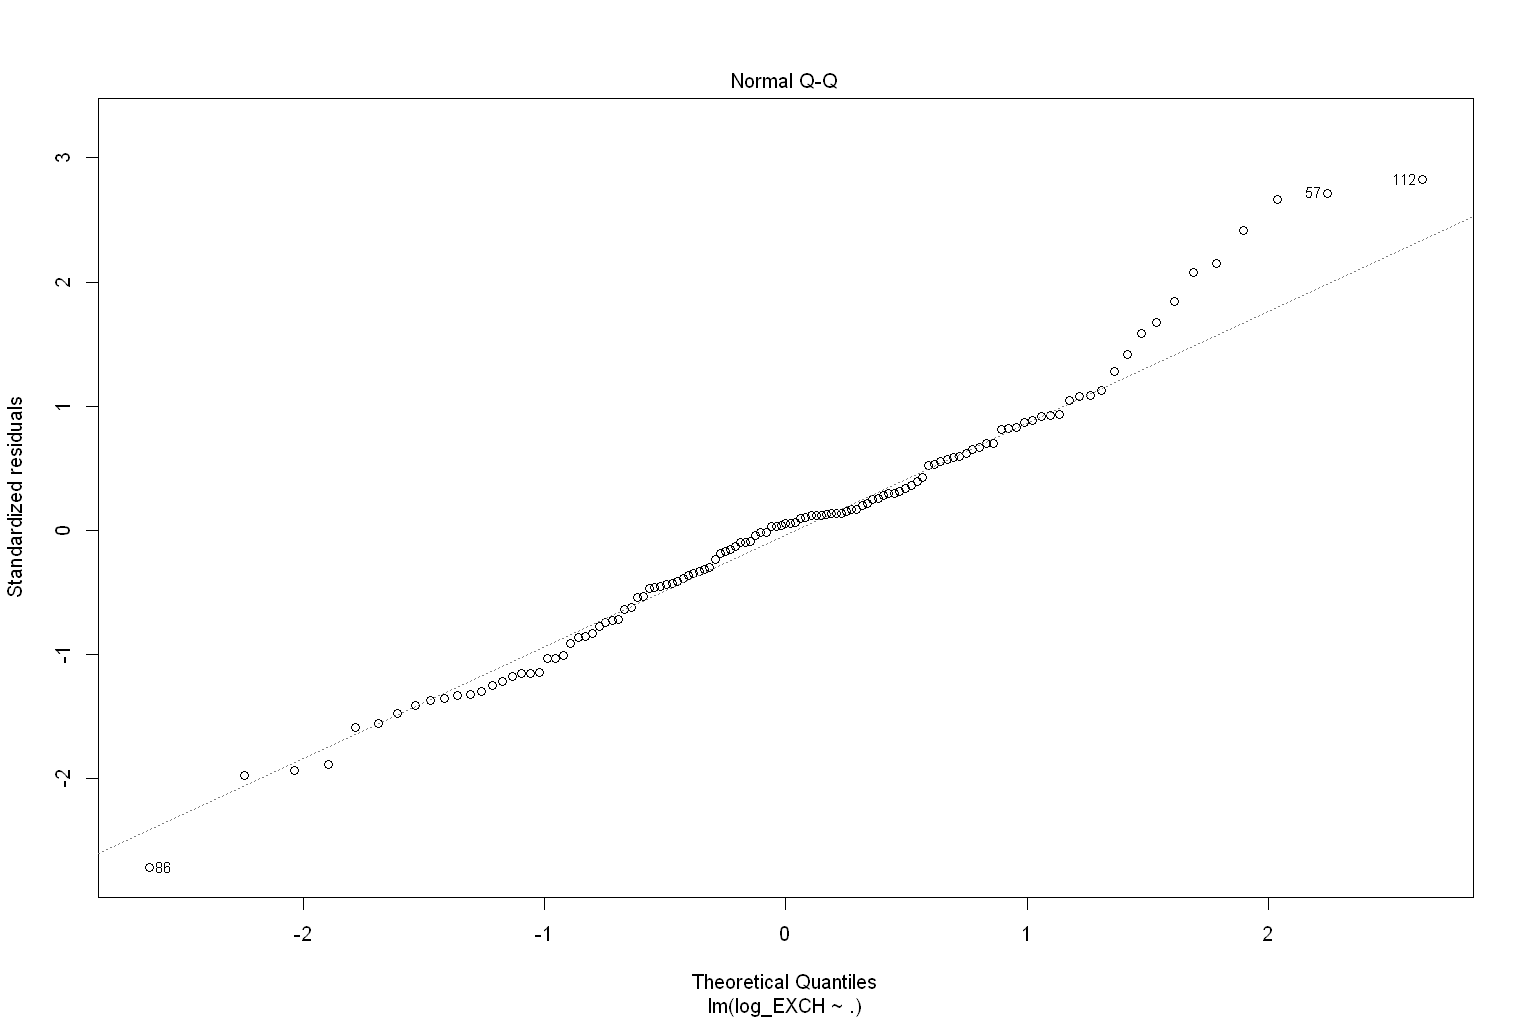

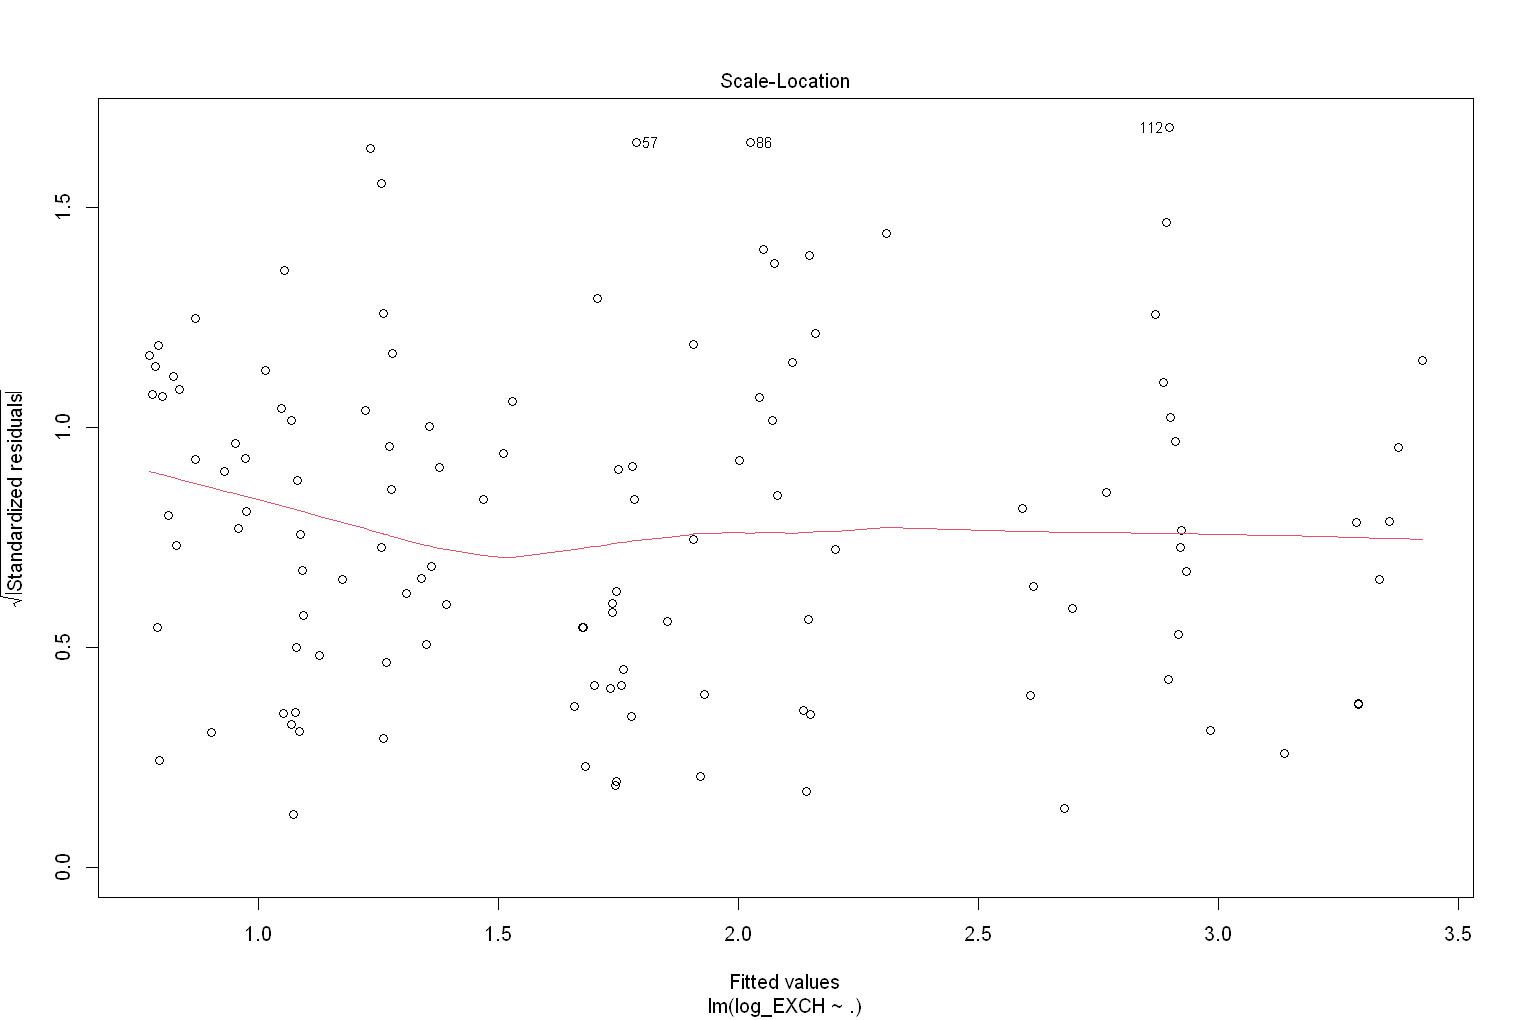

`geom_smooth()` using formula = 'y ~ x'


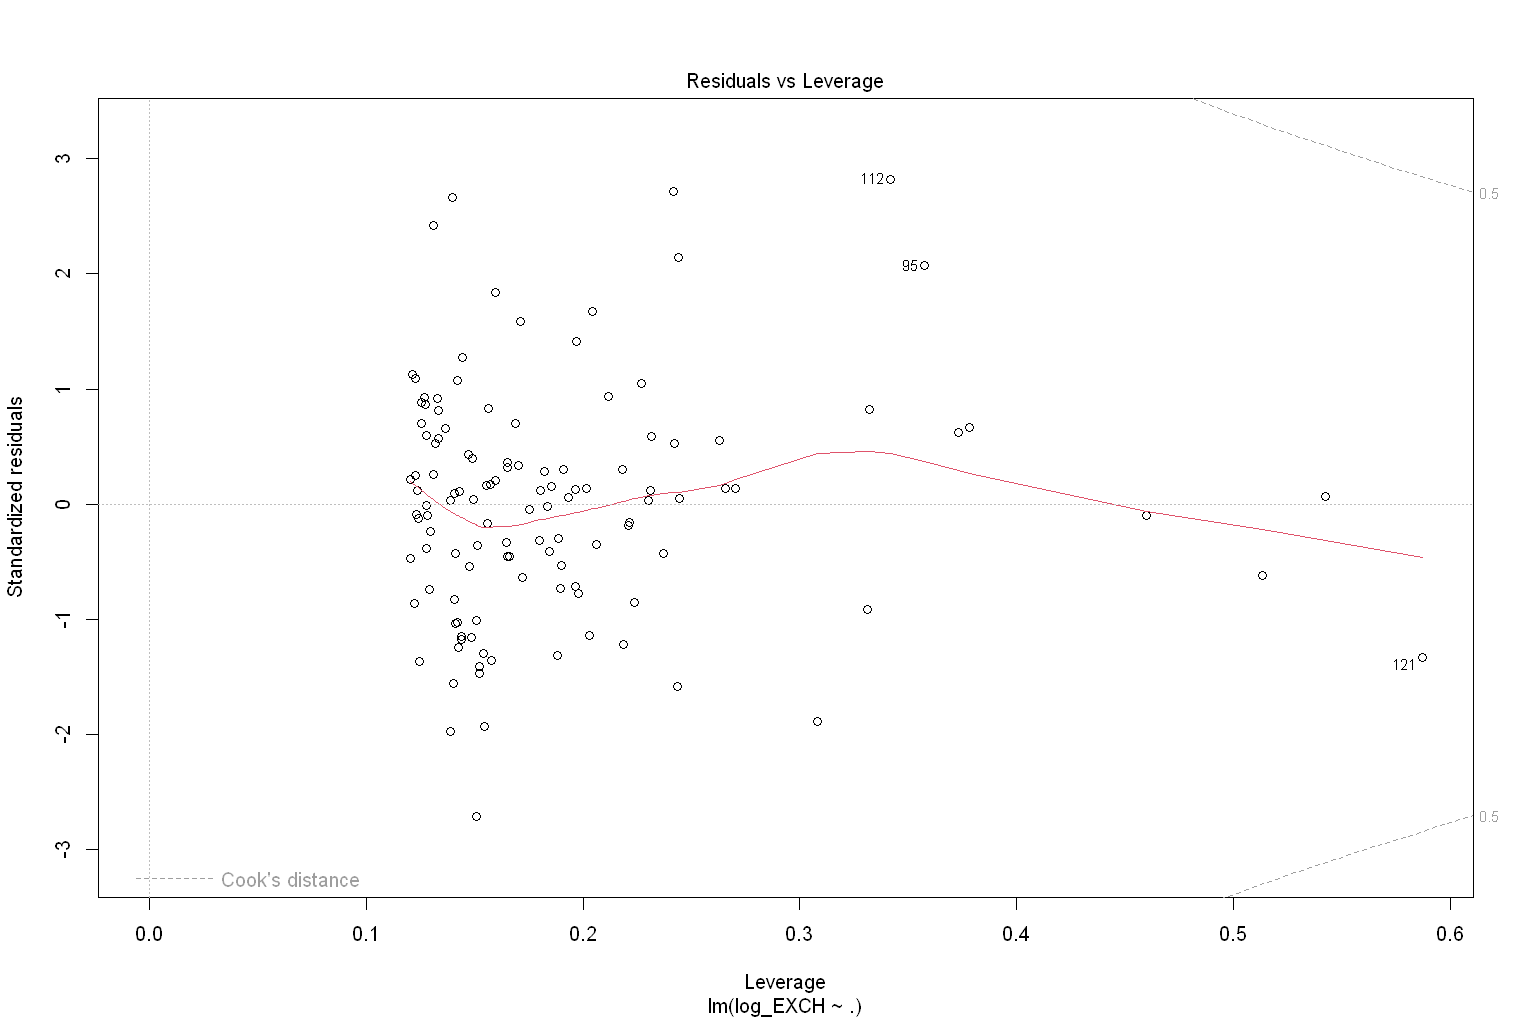

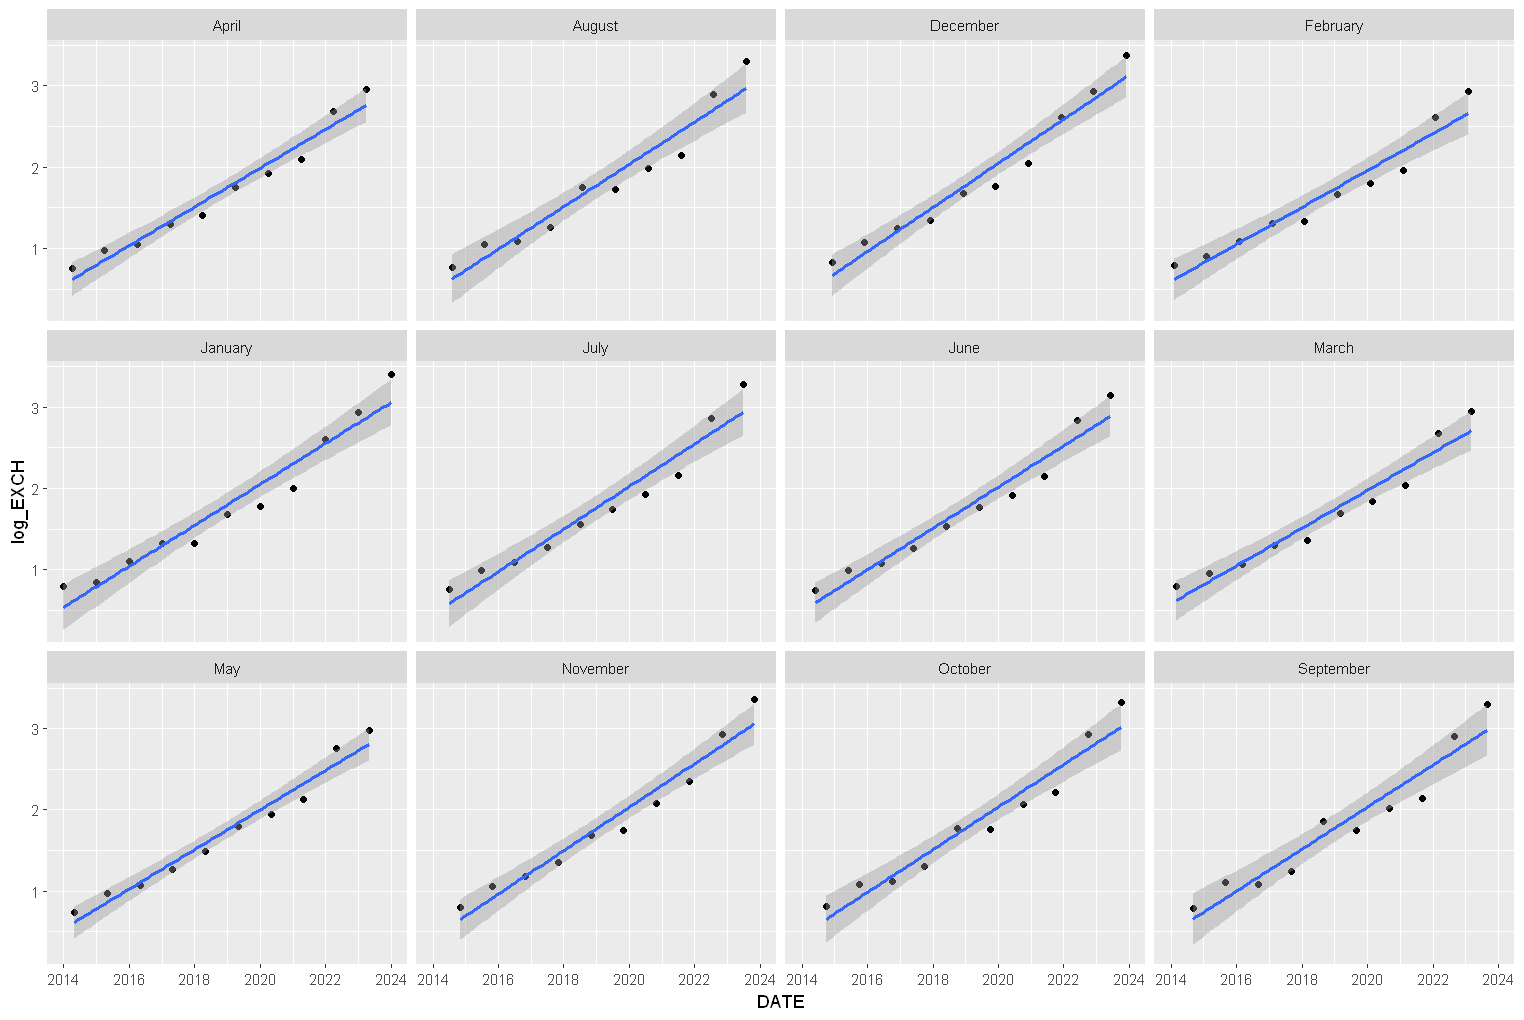

In [12]:
plot(nl_fit)
ggplot(nlin_exchange_rate,aes(x=DATE,y=log_EXCH)) +    #Checking for any irregularities within the same months of the years
  geom_point() + geom_smooth(method=lm,linewidth=1) + facet_wrap(~month_name)


Call:
lm(formula = log_EXCH ~ ., data = nlin_exchange_rate)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.068444 -0.015911  0.001247  0.013520  0.067620 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.695e+01  1.556e+00 -10.897  < 2e-16 ***
DATE                -2.218e-05  4.271e-05  -0.519   0.6047    
EXCH                 7.544e-02  8.556e-03   8.817 4.45e-14 ***
MEVTR                5.352e-03  9.033e-04   5.924 4.67e-08 ***
REZV                -1.708e-06  7.246e-07  -2.357   0.0204 *  
M3ARZ               -1.406e-10  2.361e-11  -5.956 4.05e-08 ***
PAYTP               -5.004e-06  2.529e-06  -1.979   0.0506 .  
CPIG                -3.260e-04  2.424e-04  -1.345   0.1818    
CBBS                 1.336e-11  4.316e-11   0.310   0.7575    
month_nameAugust    -1.266e-03  1.279e-02  -0.099   0.9213    
month_nameDecember   8.154e-03  1.315e-02   0.620   0.5367    
month_nameFebruary   1.276e-02  1.247e-02   1.024   0.

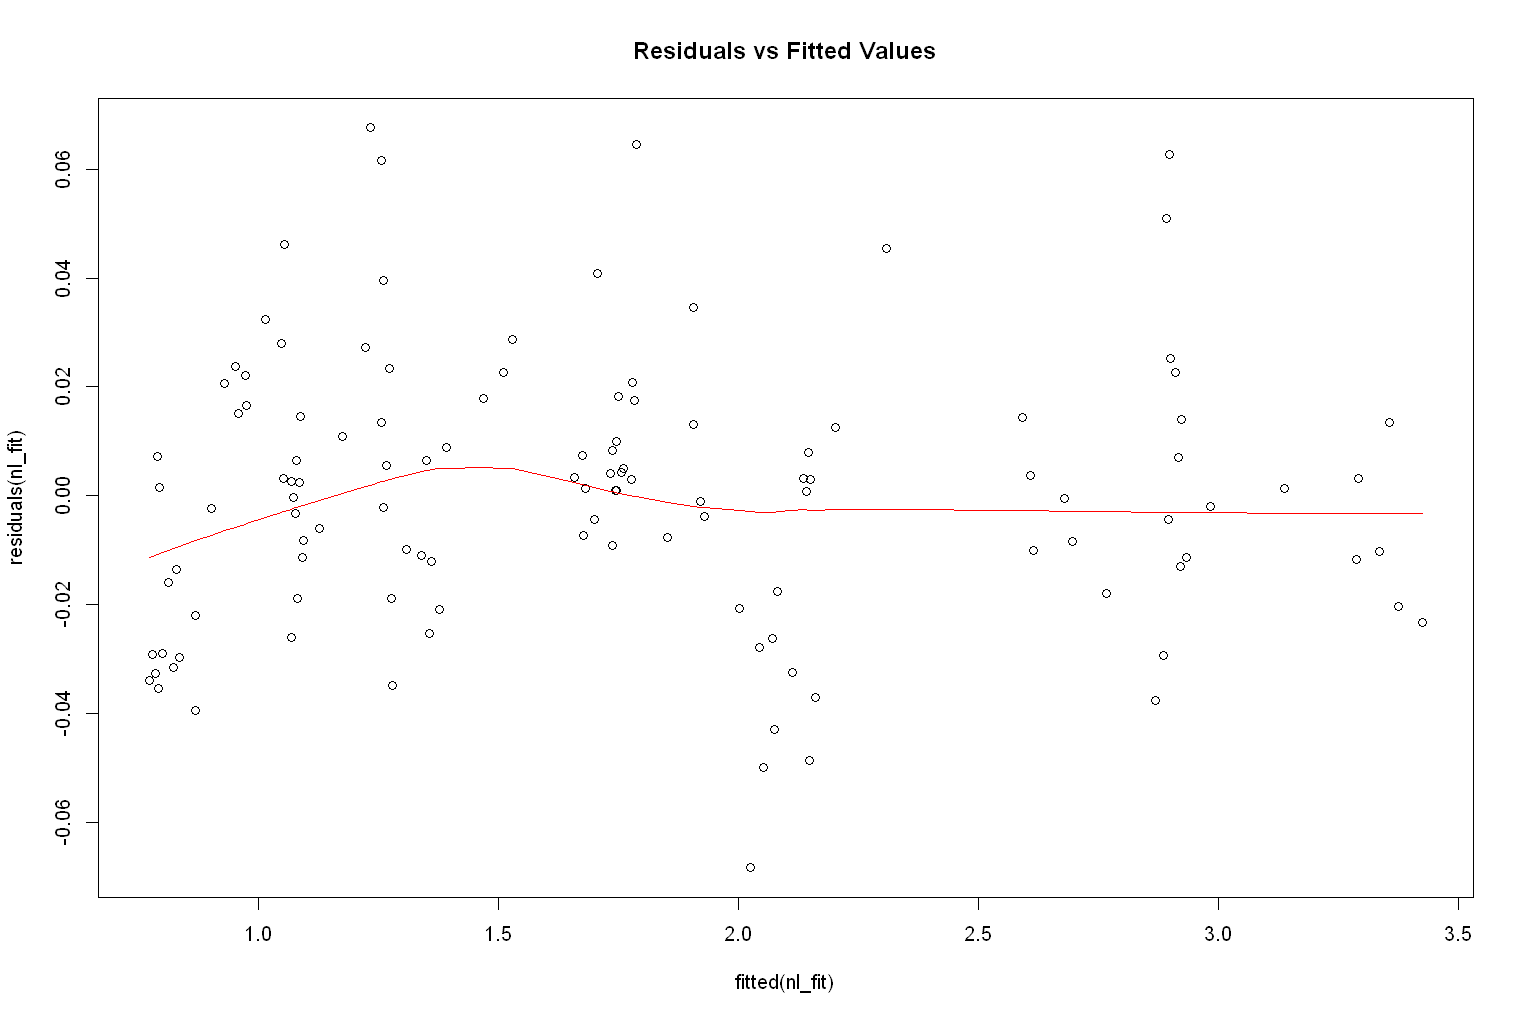

In [26]:
summary(nl_fit)
plot(residuals(nl_fit) ~ fitted(nl_fit), main = "Residuals vs Fitted Values")
lines(lowess(fitted(nl_fit), residuals(nl_fit)), col = "red")

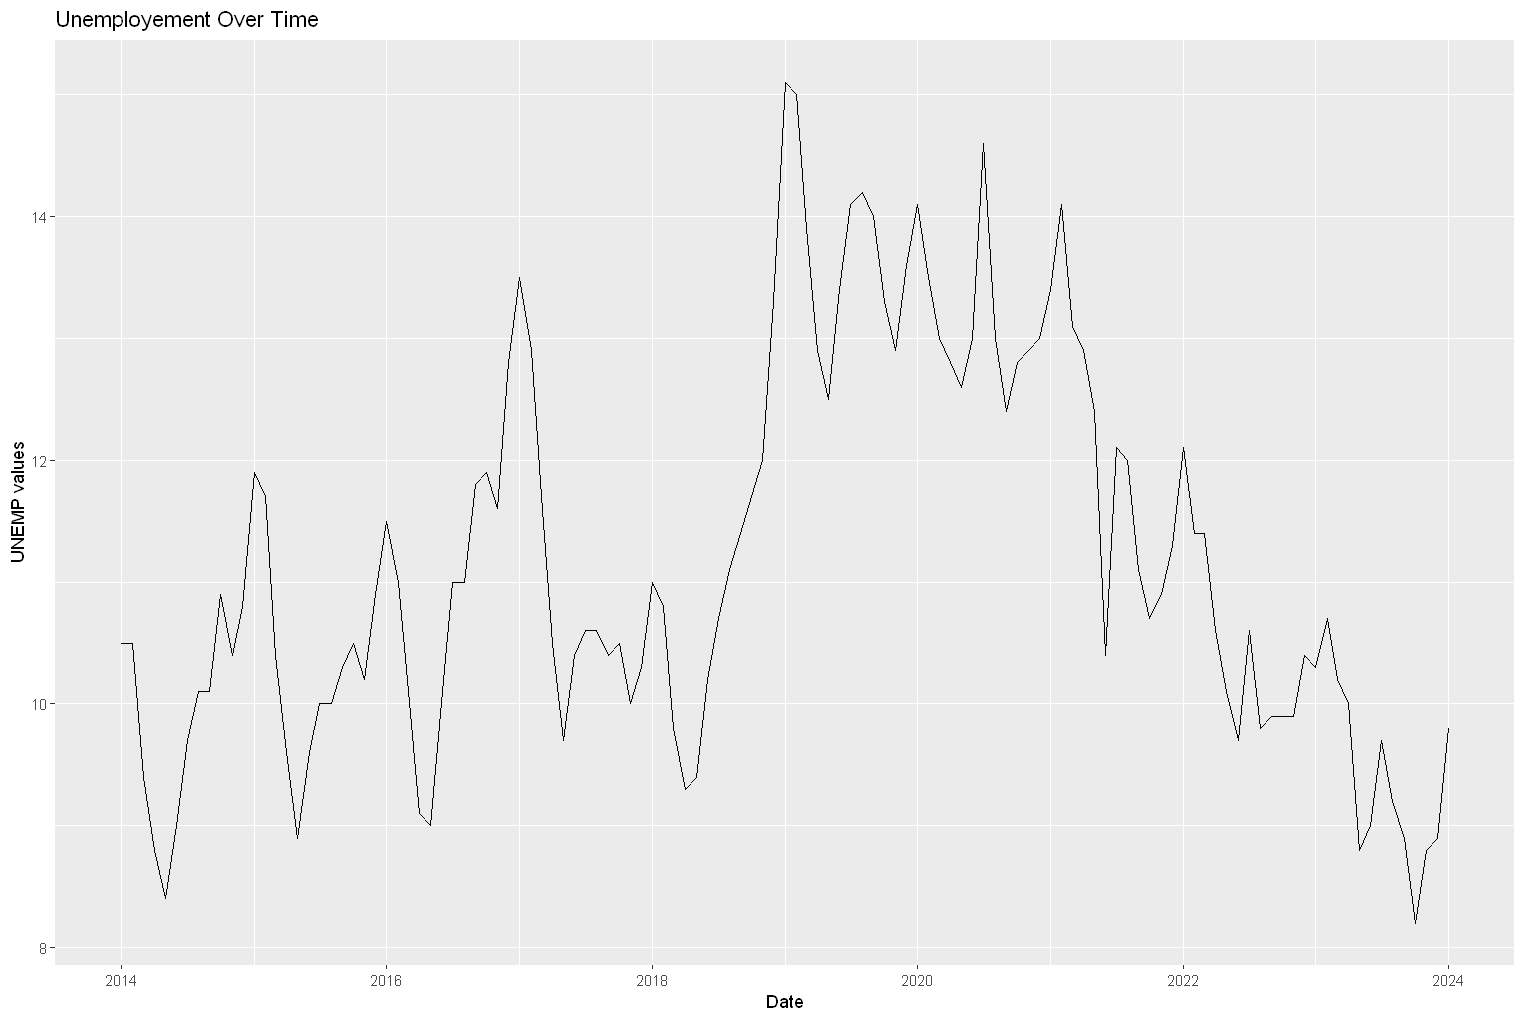

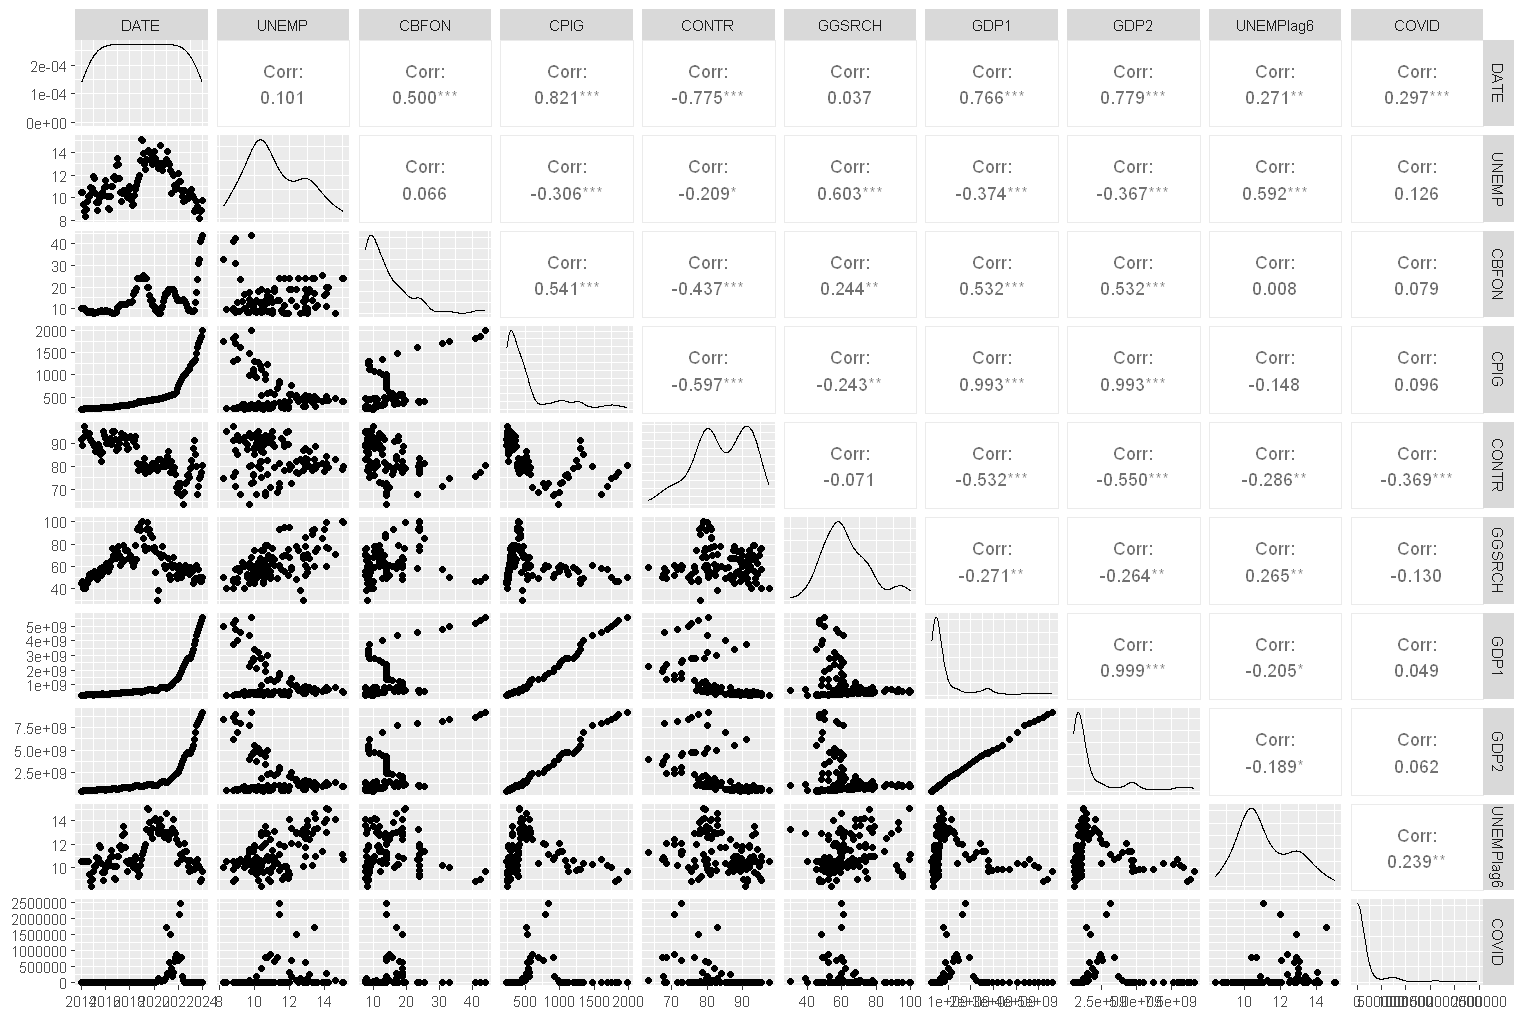

In [20]:
unemployement=read.xlsx(data_path,sheet='data_UNEMP') #Reading the data
unemployement$DATE <- as.Date(unemployement$DATE, format = "%Y-%m-%d")
ggplot(unemployement, aes(x = DATE, y = UNEMP)) +  #exchange rate over time plot
  geom_line() +
  labs(x = "Date", y = "UNEMP values", title = "Unemployement Over Time")
  ggpairs(unemployement)


Call:
lm(formula = UNEMP ~ ., data = unemployement)

Coefficients:
(Intercept)         DATE        CBFON         CPIG        CONTR       GGSRCH  
  1.022e+00    4.735e-04    8.773e-03    4.157e-03   -4.569e-02    3.904e-02  
       GDP1         GDP2    UNEMPlag6        COVID  
  6.036e-09   -4.832e-09    2.869e-01   -5.251e-08  



Call:
lm(formula = UNEMP ~ ., data = unemployement)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64585 -0.67744 -0.08469  0.65810  2.12768 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.022e+00  4.635e+00   0.220 0.825975    
DATE         4.735e-04  3.169e-04   1.494 0.137979    
CBFON        8.773e-03  1.655e-02   0.530 0.597053    
CPIG         4.157e-03  3.790e-03   1.097 0.275142    
CONTR       -4.569e-02  2.295e-02  -1.991 0.048921 *  
GGSRCH       3.904e-02  8.267e-03   4.722 6.86e-06 ***
GDP1         6.036e-09  3.559e-09   1.696 0.092689 .  
GDP2        -4.832e-09  1.716e-09  -2.816 0.005764 ** 
UNEMPlag6    2.869e-01  7.828e-02   3.665 0.000381 ***
COVID       -5.250e-08  2.607e-07  -0.201 0.840773    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9222 on 111 degrees of freedom
Multiple R-squared:  0.6958,	Adjusted R-squared:  0.6712 
F-statistic: 28.22 on 9 and 111 DF,  p-

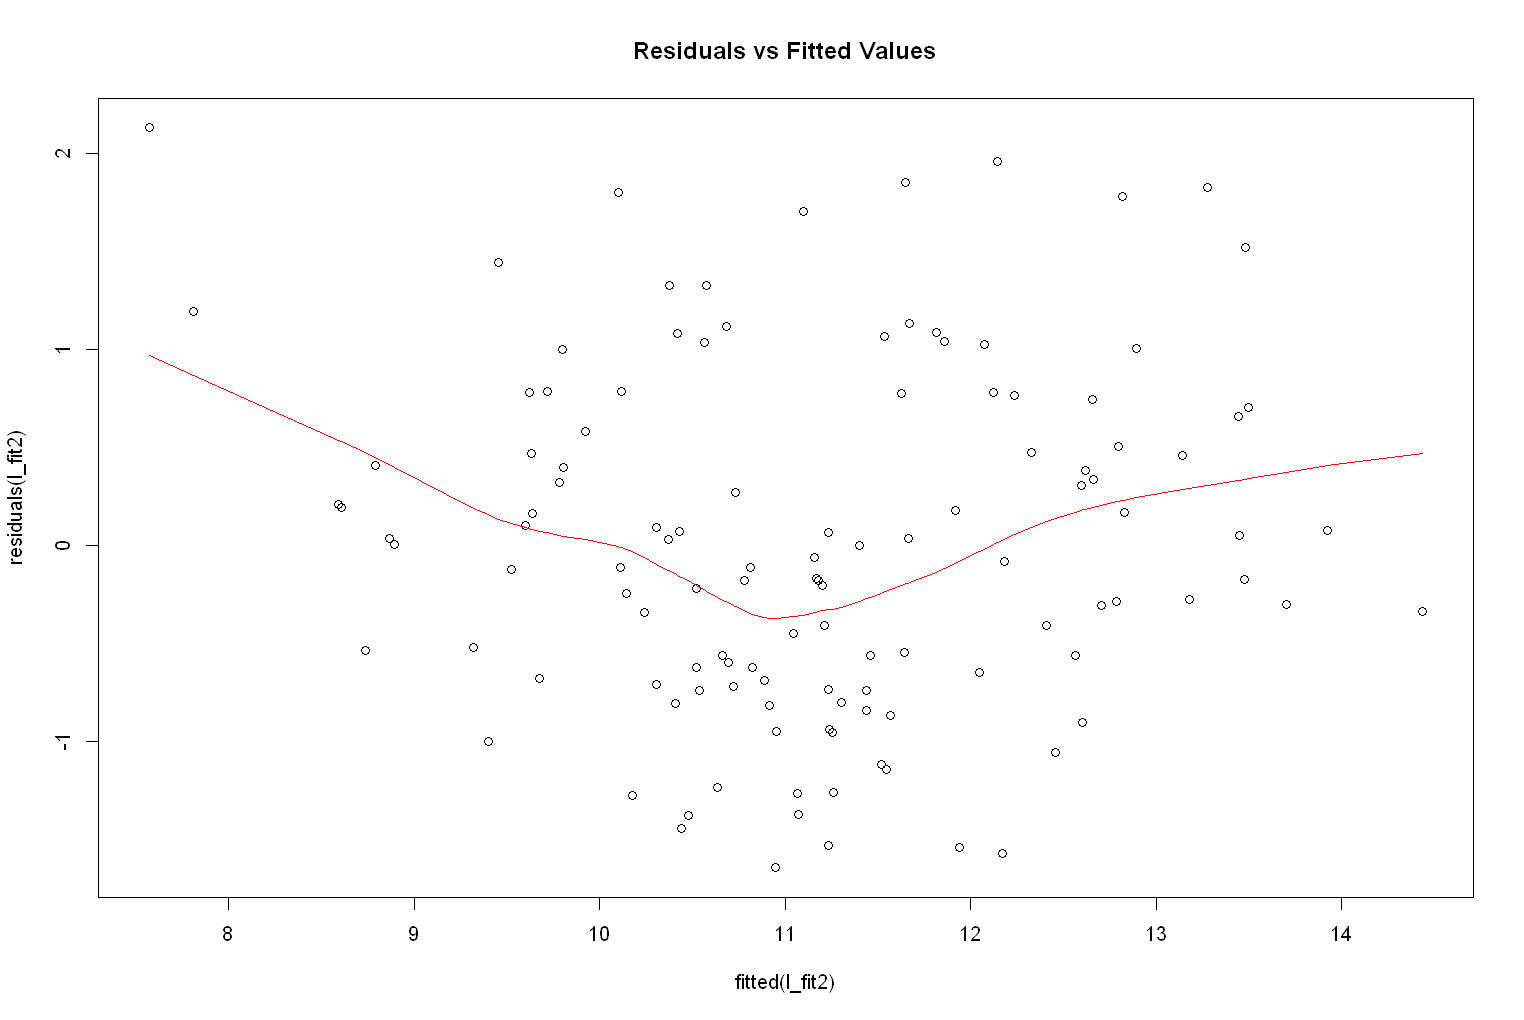

In [21]:
l_fit2 = lm(UNEMP~.,data=unemployement)
l_fit2
summary(l_fit2)
plot(residuals(l_fit2) ~ fitted(l_fit2), main = "Residuals vs Fitted Values")
lines(lowess(fitted(l_fit2), residuals(l_fit2)), col = "red")

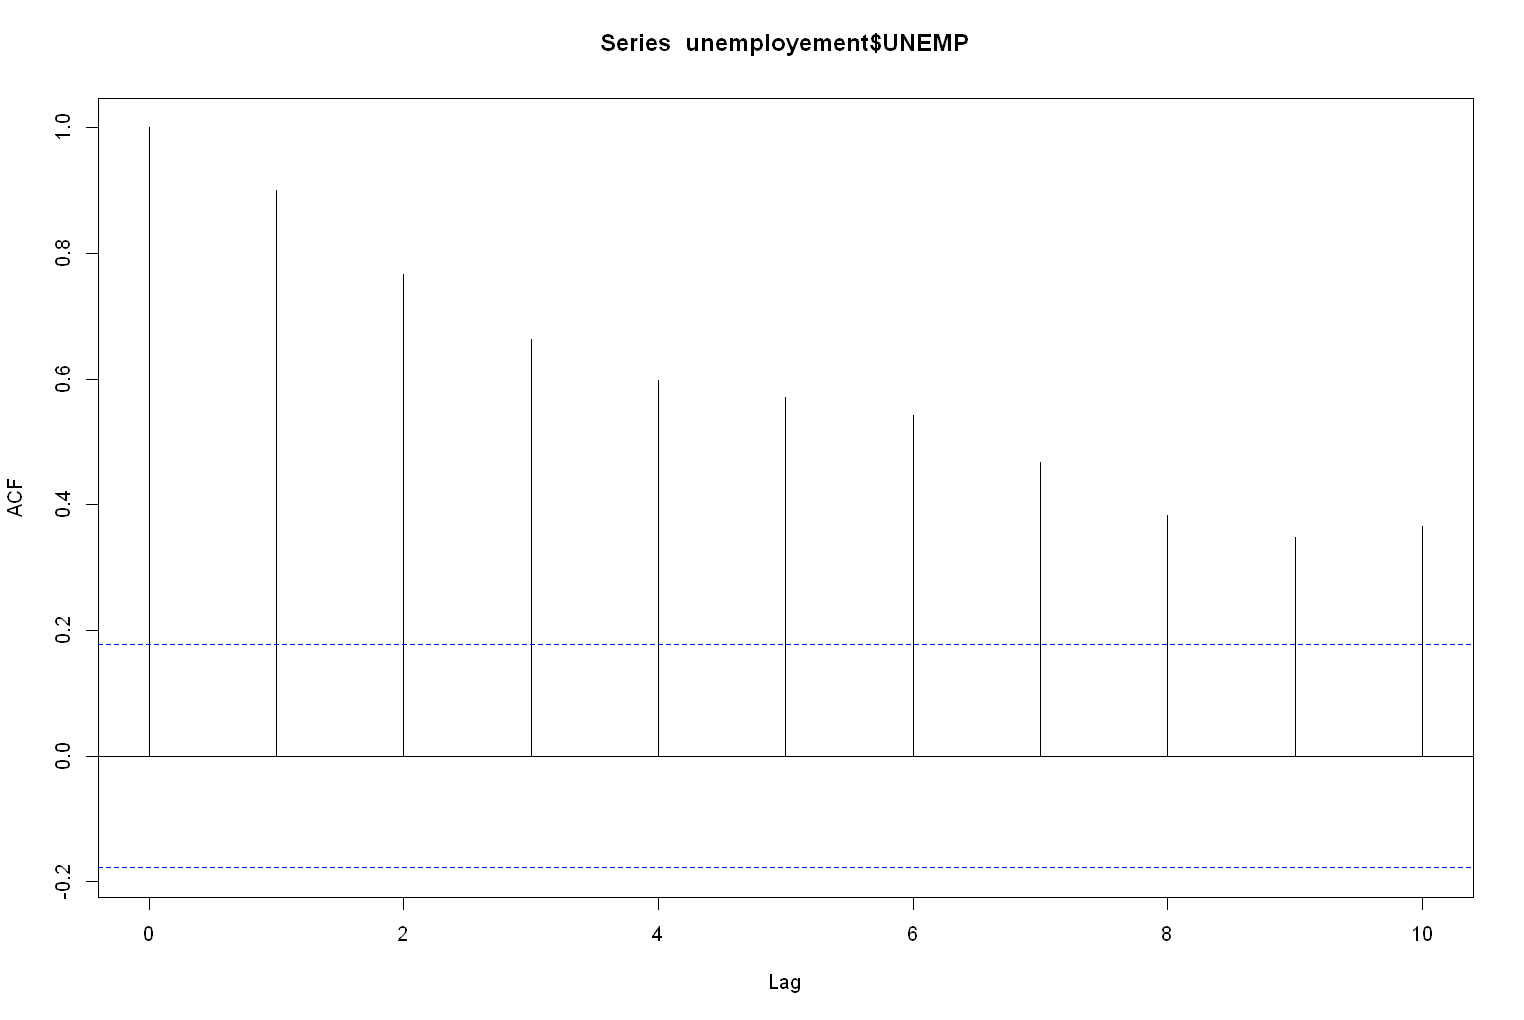

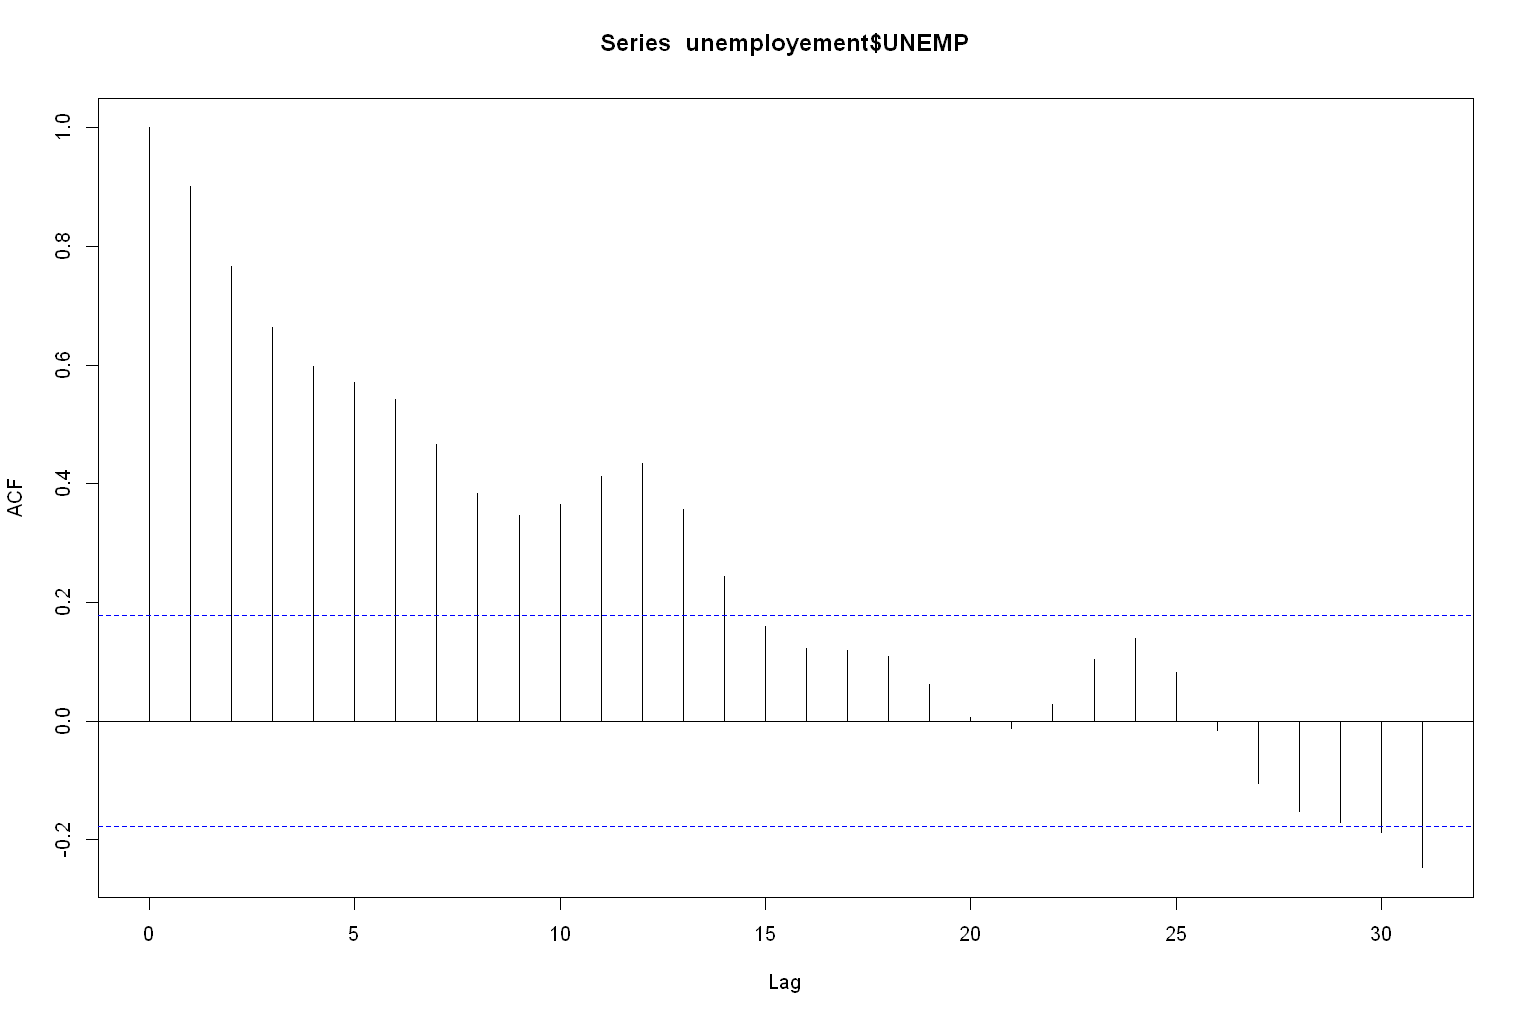

,DATE,UNEMP,CBFON,CPIG,CONTR,GGSRCH,GDP1,GDP2,UNEMPlag6,COVID,month_name
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
116,2023-08-01,9.2,23.50,1614.31,68.01000,58,4594834582,7941533842,10.7,0,August
117,2023-09-01,8.9,31.00,1691.04,71.47000,57,4798261638,8186454342,10.2,0,September
118,2023-10-01,8.2,33.00,1749.11,74.62000,50,5001688693,8431374842,10.0,0,October
119,2023-11-01,8.8,41.09,1806.50,75.47000,47,5205115749,8676295342,8.8,0,November
120,2023-12-01,8.9,42.50,1859.38,77.42000,47,5408542804,8921215842,9.0,0,December
121,2024-01-01,9.8,44.00,1984.02,80.42311,50,5611969860,9166136342,9.7,0,January


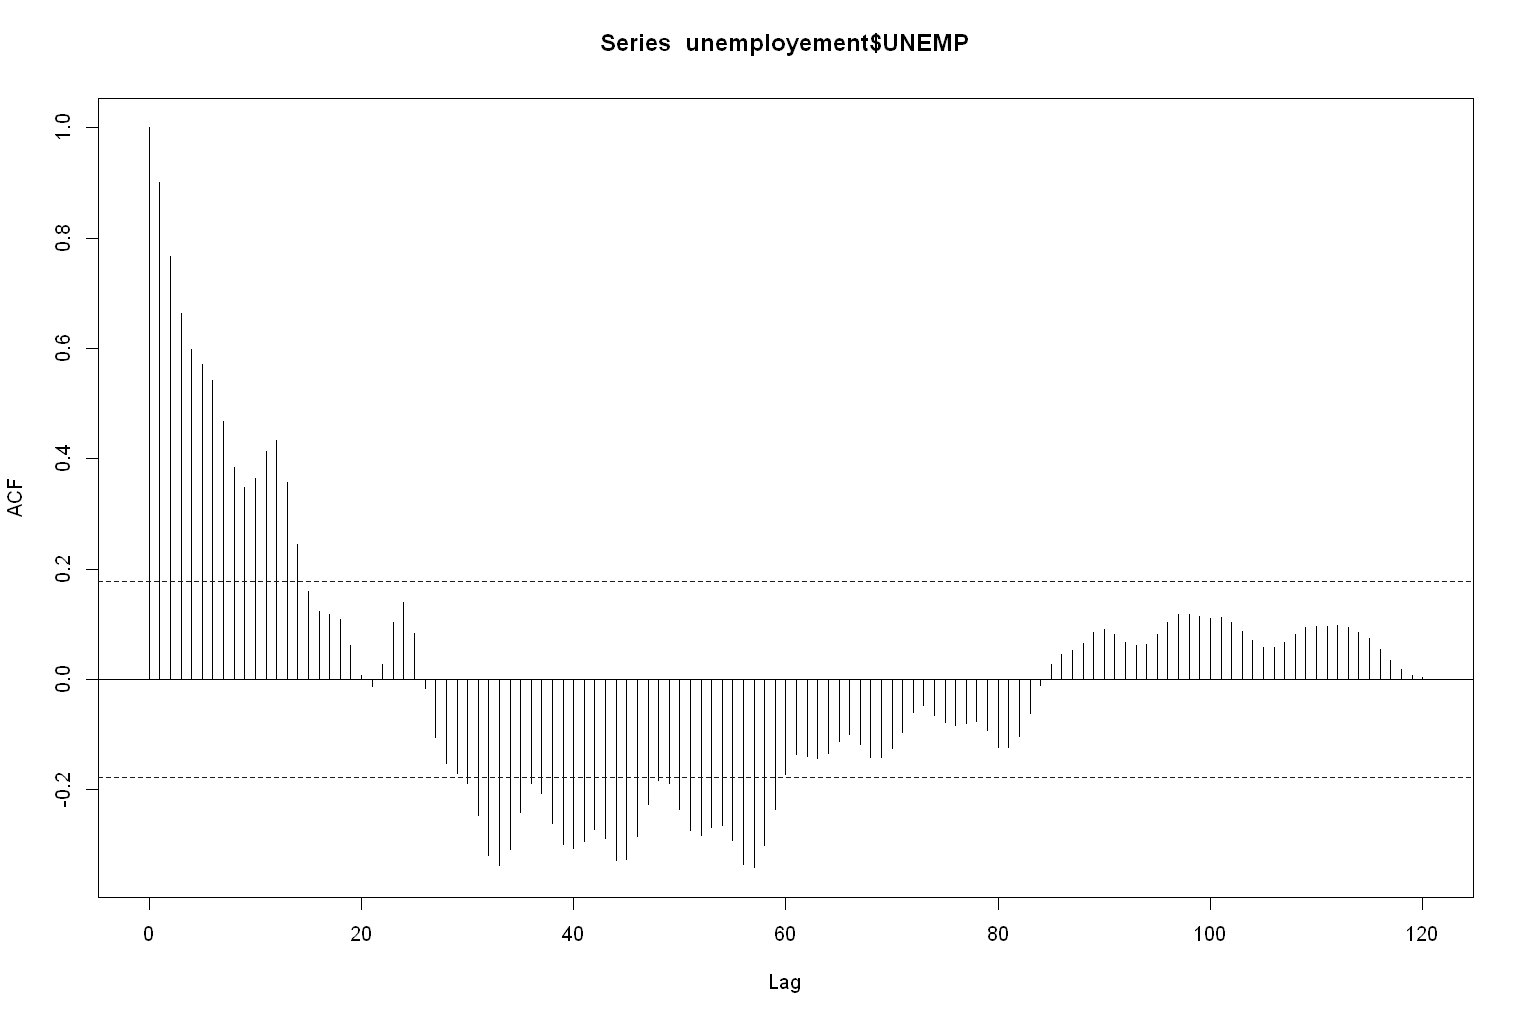

In [23]:
acf(unemployement$UNEMP, lag.max = 10)
acf(unemployement$UNEMP, lag.max = 31)
acf(unemployement$UNEMP, lag.max = 360)
unemployement$month_name <- month.name[month(unemployement$DATE)] #Adding categorical month variables for seasonality
tail(unemployement)


Call:
lm(formula = UNEMP ~ ., data = unemployement)

Coefficients:
        (Intercept)                 DATE                CBFON  
         -3.356e+00            7.940e-04            1.353e-02  
               CPIG                CONTR               GGSRCH  
         -1.768e-03           -4.712e-02            2.894e-02  
               GDP1                 GDP2            UNEMPlag6  
          5.500e-09           -3.532e-09            3.221e-01  
              COVID     month_nameAugust   month_nameDecember  
         -3.097e-07           -5.261e-03            8.090e-01  
 month_nameFebruary    month_nameJanuary       month_nameJuly  
          1.076e+00            1.267e+00            1.668e-01  
     month_nameJune      month_nameMarch        month_nameMay  
         -4.189e-01            4.318e-01           -3.325e-01  
 month_nameNovember    month_nameOctober  month_nameSeptember  
          3.450e-01            2.500e-01            1.246e-02  



Call:
lm(formula = UNEMP ~ ., data = unemployement)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5195 -0.5567 -0.0521  0.5178  1.7575 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -3.356e+00  4.527e+00  -0.741 0.460223    
DATE                 7.940e-04  3.403e-04   2.333 0.021638 *  
CBFON                1.353e-02  1.555e-02   0.870 0.386137    
CPIG                -1.768e-03  4.004e-03  -0.442 0.659763    
CONTR               -4.712e-02  2.282e-02  -2.065 0.041547 *  
GGSRCH               2.894e-02  8.713e-03   3.322 0.001250 ** 
GDP1                 5.500e-09  3.554e-09   1.548 0.124824    
GDP2                -3.532e-09  1.744e-09  -2.026 0.045456 *  
UNEMPlag6            3.221e-01  9.050e-02   3.559 0.000571 ***
COVID               -3.097e-07  2.472e-07  -1.253 0.213142    
month_nameAugust    -5.261e-03  4.223e-01  -0.012 0.990084    
month_nameDecember   8.090e-01  3.970e-01   2.038 0.044188 *  
month_nameFebruary 

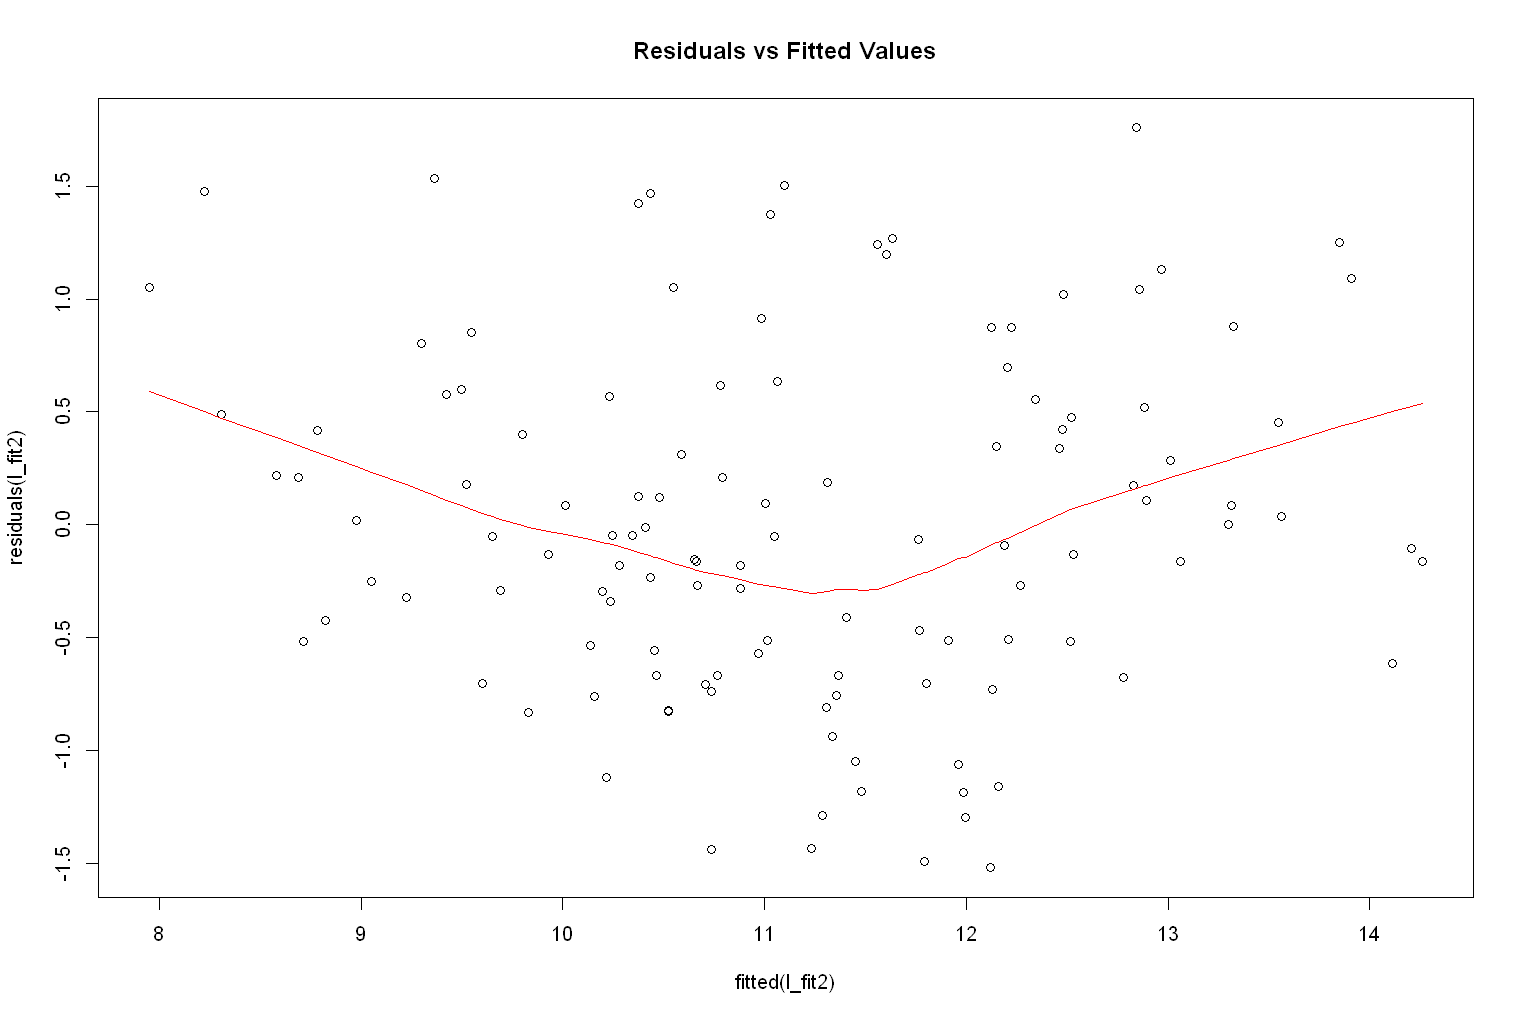

In [24]:
l_fit2 = lm(UNEMP~.,data=unemployement)
l_fit2
summary(l_fit2)
plot(residuals(l_fit2) ~ fitted(l_fit2), main = "Residuals vs Fitted Values")
lines(lowess(fitted(l_fit2), residuals(l_fit2)), col = "red")

`geom_smooth()` using formula = 'y ~ x'


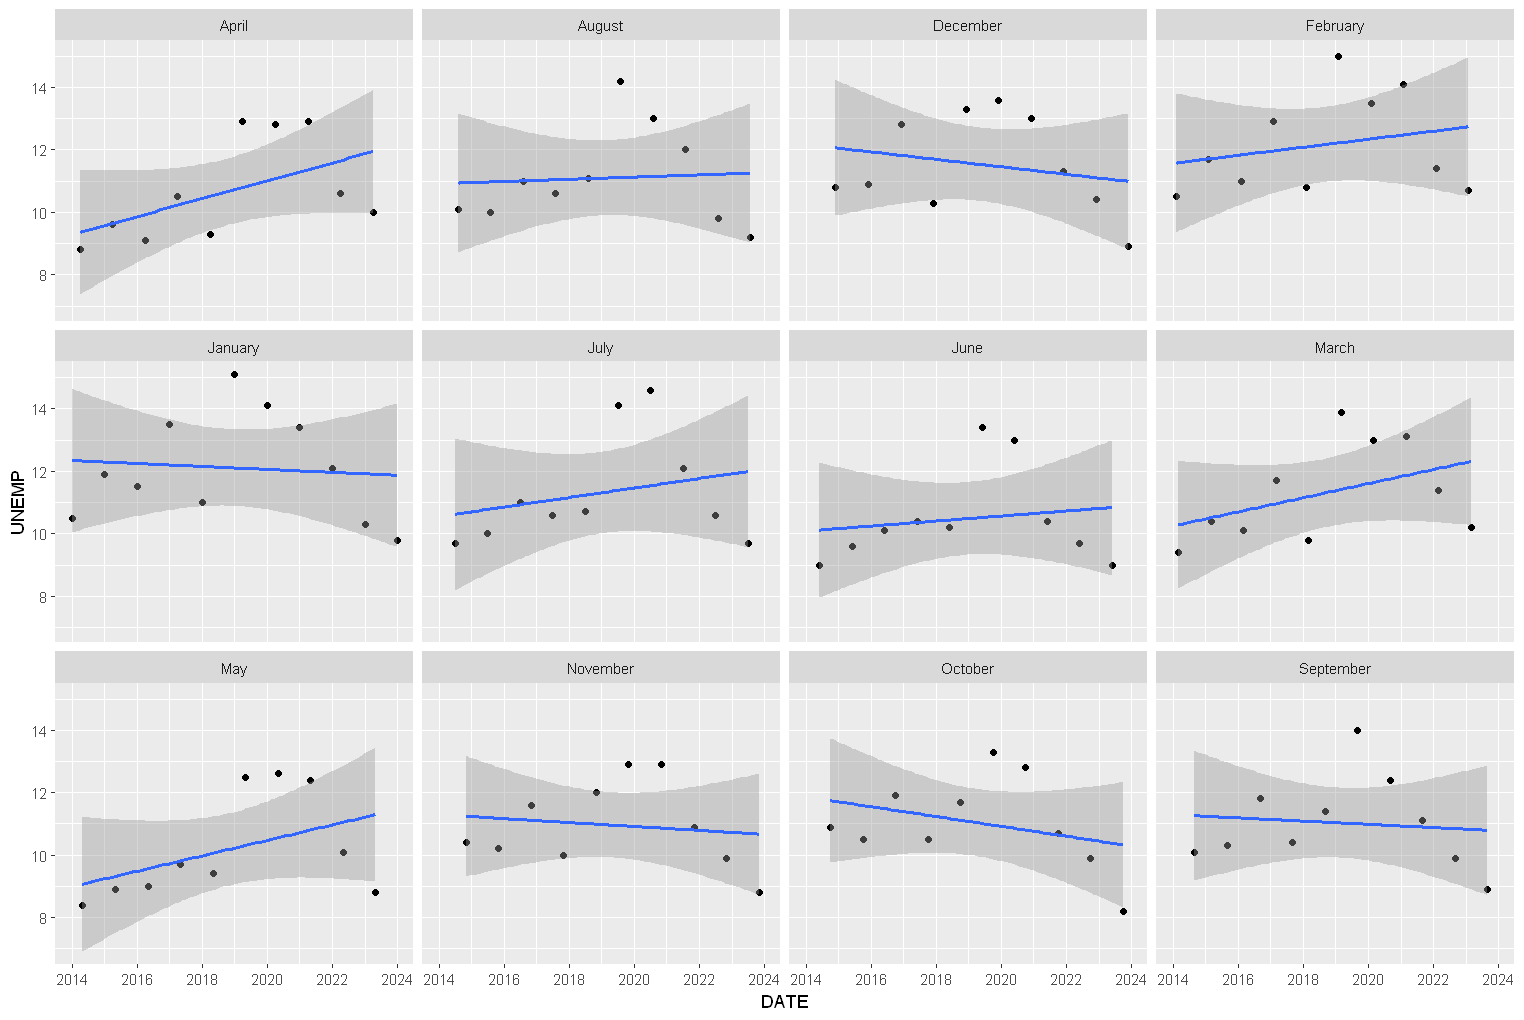

In [25]:
ggplot(unemployement,aes(x=DATE,y=UNEMP)) +    #Checking for any irregularities within the same months of the years
  geom_point() + geom_smooth(method=lm,linewidth=1) + facet_wrap(~month_name)